<a href="https://colab.research.google.com/github/realmistic/PythonInvest-basic-fin-analysis/blob/master/PythonInvest_com_14_Exploring_Tech_Indicators_For_Stocks_and_Crypto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> **Exploring Tech Indicators For Stocks and Crypto**
* **What?** Extract over 100 tech. indicators from top 25 stocks and 25 crypto tickers
* **Why?** Traders rely on technical indicators for immediate insights into market dynamics, crucial for timing trades and managing risk effectively. Unlike fundamental analysis or alternative data, technical indicators offer real-time signals, aiding in identifying optimal entry and exit points, determining market sentiment, and confirming patterns. Their adaptability across asset classes and timeframes makes them versatile tools for traders, particularly in algorithmic trading strategies. In essence, technical indicators complement other analyses by providing quantifiable signals essential for navigating the complexities of financial markets.  
* **How?** Using Yahoo Finance to get the hourly data, and Ta-Lib library to calculate all technical indicators
* **Plan**
  0. Prep work : installs and imports
  1. OHLCV Data + Visualisation from Yahoo Finance
  2. Top 25 most active US stocks (end-March 2024)
  3. Top 25 crypto coins (end-March 2024). Merge stocks and crypto to one dataframe
  4. Add historical and future returns
  5. Ta-Lib functions to obtain 100 indicators
  6. Apply them to one ticker (BTC-USD)
  7. Get tech. indicators for all 50 stocks+crypto tickers
  8. Correlations between future returns (1 and 24 hrs) with 100 tech. indicators
  9. Decision Trees to make predictions on tech. indicators and get the updated list of the features importance.

* **Detailed Article on PythonInvest** <br>
https://pythoninvest.com/long-read/tech-indicators-on-crypto-and-stocks

# 0) Imports

In [ ]:
# https://stackoverflow.com/questions/49648391/how-to-install-ta-lib-in-google-colab
# Update (apr 2023): Colab is now Python 3.10
# there are some other (older) ways to install talib

url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3
import talib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4119    0  4119    0     0  15222      0 --:--:-- --:--:-- --:--:-- 15255
100  517k  100  517k    0     0   300k      0  0:00:01  0:00:01 --:--:--  376k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4083    0  4083    0     0  11391      0 --:--:-- --:--:-- --:--:-- 11405
100  392k  100  392k    0     0   508k      0 --:--:-- --:--:-- --:--:--  986k


In [ ]:
# https://medium.com/analytics-vidhya/python-how-to-get-bitcoin-data-in-real-time-less-than-1-second-lag-38772da43740
!pip install yfinance

In [ ]:
!pip install plotly

In [ ]:
# IMPORTS
# Raw Package
import numpy as np
import pandas as pd
#Data Source
import yfinance as yf
#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time


# 1) Download data function
* use yfinance to perform a direct call and define a function to download and visualise

In [ ]:
# easiest way to download - direct call of YFinance
sample = yf.download(tickers = "BTC-USD",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
sample.head(1)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   

              Volume  
Date                  
2014-09-17  21056800

In [ ]:
sample.tail(1)

Open          High           Low        Close  \
Date                                                                
2024-03-30  69889.773438  70276.617188  69715.507812  69720.40625   

              Adj Close       Volume  
Date                                  
2024-03-30  69720.40625  17335599104

<Axes: title={'center': 'Close Price for BTC_USD'}, xlabel='Date'>

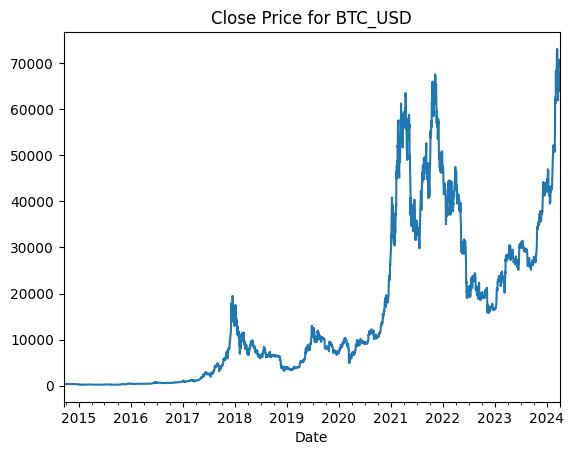

In [ ]:
sample['Close'].plot.line(title='Close Price for BTC_USD')

In [ ]:
# Define function-wrapper

#  PARAMS:
#  period : str
#   Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
#   Either Use period parameter or use start and end
#  Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
#             Intraday data cannot extend last 60 days

def get_stats(ticker='BTC-USD', period='2y', interval='1h', show_graph=True):

  # Get Ticker data
  data = yf.download(tickers = ticker,
                     period = period,
                     interval = interval)

  if show_graph:
    #declare figure
    fig = go.Figure()

    #Candlestick
    fig.add_trace(go.Candlestick(x=data.index,
                    open=data['Open'],
                    high=data['High'],
                    low=data['Low'],
                    close=data['Close'], name = 'market data'))

    # Add titles
    fig.update_layout(
        title=f'{ticker} live share price evolution',
        yaxis_title=f'{ticker} Price $')

    # X-Axes
    fig.update_xaxes(
        rangeslider_visible=True,
        rangeselector=dict(
            buttons=list([
                dict(count=15, label="15m", step="minute", stepmode="backward"),
                dict(count=45, label="45m", step="minute", stepmode="backward"),
                dict(count=1, label="HTD", step="hour", stepmode="todate"),
                dict(count=6, label="6h", step="hour", stepmode="backward"),
                dict(step="all")
            ])
        )
    )

    #Show
    fig.show()

  return data

In [ ]:
btc_usd_minute = get_stats('BTC-USD', period='24h', interval='1m', show_graph=True)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
btc_usd_hourly = get_stats('BTC-USD', period='2y', interval='1h', show_graph=True)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
nvda_hourly = get_stats('NVDA', period='2y', interval='1h', show_graph=True)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# 1mo
# max: ERROR:yfinance:['ETH-USD']: Exception('%ticker%: 1h data not available for startTime=1510185600 and endTime=1706827869. The requested range must be within the last 730 days.')
eth_usd_hourly = get_stats('ETH-USD', period='2y', interval='1h', show_graph=True)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
usdt_usd_hourly = get_stats('USDT-USD', period='1mo', interval='1h', show_graph=True)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
usdt_usd_hourly.head(10)

Open      High       Low     Close  Adj Close  \
Datetime                                                                       
2024-02-29 22:00:00+00:00  1.000839  1.000966  1.000186  1.000223   1.000223   
2024-02-29 23:00:00+00:00  1.000660  1.000660  0.999989  1.000457   1.000457   
2024-03-01 00:00:00+00:00  1.000388  1.000572  0.999782  1.000202   1.000202   
2024-03-01 01:00:00+00:00  1.000252  1.000323  0.999884  1.000065   1.000065   
2024-03-01 02:00:00+00:00  1.000147  1.000389  0.999908  1.000287   1.000287   
2024-03-01 03:00:00+00:00  1.000289  1.000390  0.999860  1.000190   1.000190   
2024-03-01 04:00:00+00:00  1.000253  1.000294  0.999607  1.000078   1.000078   
2024-03-01 05:00:00+00:00  0.999932  1.000248  0.999885  1.000164   1.000164   
2024-03-01 06:00:00+00:00  1.000065  1.000306  0.999681  1.000203   1.000203   
2024-03-01 07:00:00+00:00  1.000118  1.000373  0.999684  1.000286   1.000286   

                           Volume  
Datetime                           
2024-02-29 22:00:00+00:00       0  
2024-02-29 23:00:00+00:00       0  
2024-03-01 00:00:00+00:00       0  
2024-03-01 01:00:00+00:00       0  
2024-03-01 02:00:00+00:00       0  
2024-03-01 03:00:00+00:00       0  
2024-03-01 04:00:00+00:00       0  
2024-03-01 05:00:00+00:00       0  
2024-03-01 06:00:00+00:00       0  
2024-03-01 07:00:00+00:00       0

In [ ]:
bnb_usd_hourly = get_stats('BNB-USD', period='1mo', interval='1h', show_graph=True)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
bnb_usd_hourly.head()

Open        High         Low       Close  \
Datetime                                                                    
2024-02-29 22:00:00+00:00  402.646637  402.926361  392.379883  396.369812   
2024-02-29 23:00:00+00:00  396.539886  400.774200  396.456940  399.893402   
2024-03-01 00:00:00+00:00  399.672424  404.203430  399.478302  404.203430   
2024-03-01 01:00:00+00:00  404.220917  404.787537  402.721924  404.787537   
2024-03-01 02:00:00+00:00  404.804932  405.831451  403.585358  405.512634   

                            Adj Close   Volume  
Datetime                                        
2024-02-29 22:00:00+00:00  396.369812        0  
2024-02-29 23:00:00+00:00  399.893402        0  
2024-03-01 00:00:00+00:00  404.203430        0  
2024-03-01 01:00:00+00:00  404.787537        0  
2024-03-01 02:00:00+00:00  405.512634  1038848

In [ ]:
# you can download stocks info too
qcom_hourly = get_stats('QCOM', period='max', interval='1d', show_graph=True)

[*********************100%%**********************]  1 of 1 completed


# 2) Get top 25 most active stocks (Yahoo Finance)

## 2.1) The list of stocks

In [ ]:
# Screener: most active trading stocks
# don't need to write a scrapper - one call function - but not always working correctly)))
yfinance_most_active_stocks_web = pd.read_html("https://finance.yahoo.com/most-active/?offset=0&count=100")

In [ ]:
yfinance_most_active_stocks_web[0]

Symbol                              Name  Price (Intraday)  Change  \
0    MARA   Marathon Digital Holdings, Inc.             22.58    0.51   
1    TSLA                       Tesla, Inc.            175.79   -4.04   
2    PLTR        Palantir Technologies Inc.             23.01   -1.50   
3    AAPL                        Apple Inc.            171.48   -1.83   
4    ROIV             Roivant Sciences Ltd.             10.54   -0.30   
5     CCL        Carnival Corporation & plc             16.34   -0.85   
6       F                Ford Motor Company             13.28    0.22   
7     AMD      Advanced Micro Devices, Inc.            180.49    0.90   
8     NIO                          NIO Inc.              4.50   -0.17   
9     RUN                       Sunrun Inc.             13.18    0.08   
10   INTC                 Intel Corporation             44.17    0.40   
11   NYCB  New York Community Bancorp, Inc.              3.22   -0.12   
12   NVDA                NVIDIA Corporation            903.56    1.06   
13   RIVN           Rivian Automotive, Inc.             10.95   -0.04   
14   CLSK                  CleanSpark, Inc.             21.21   -1.90   
15    BAC       Bank of America Corporation             37.92    0.11   
16    PFE                       Pfizer Inc.             27.75   -0.03   
17   AMZN                  Amazon.com, Inc.            180.38    0.55   
18    AAL      American Airlines Group Inc.             15.35    0.05   
19    WBA    Walgreens Boots Alliance, Inc.             21.69    0.67   
20      T                         AT&T Inc.             17.60    0.05   
21   SOFI           SoFi Technologies, Inc.              7.30   -0.06   
22   GOLD          Barrick Gold Corporation             16.64    0.43   
23   XPEV                        XPeng Inc.              7.68   -0.13   
24   VALE                         Vale S.A.             12.19    0.02   

   % Change   Volume Avg Vol (3 month) Market Cap  PE Ratio (TTM)  \
0    +2.31%  85.605M           82.781M     6.043B           21.30   
1    -2.25%  76.893M          102.666M   559.854B           40.88   
2    -6.12%  65.652M           71.772M    50.915B          255.67   
3    -1.06%  64.574M           61.994M     2.648T           26.67   
4    -2.77%  64.414M            6.718M     8.494B            2.00   
5    -4.94%  57.079M           32.867M    21.405B           51.06   
6    +1.68%  53.985M           54.664M     52.77B           12.30   
7    +0.50%  56.856M           77.953M   291.697B          347.10   
8    -3.64%  54.706M           58.401M     9.405B             NaN   
9    +0.61%  54.189M           15.134M     2.894B             NaN   
10   +0.91%  54.176M           45.367M   186.751B          110.42   
11   -3.59%  45.515M           39.867M     2.569B             NaN   
12   +0.12%  43.138M           53.957M     2.259T           75.74   
13   -0.36%  42.875M           43.349M    10.703B             NaN   
14   -8.22%  42.203M           36.013M     4.201B             NaN   
15   +0.29%  42.224M            41.13M   299.213B           12.31   
16   -0.11%  39.793M           43.833M   157.135B           75.00   
17   +0.31%  36.539M           44.268M     1.874T           62.20   
18   +0.33%  33.715M           34.277M    10.051B           12.69   
19   +3.19%  32.796M           13.948M    18.705B           32.86   
20   +0.28%  21.741M           38.866M   125.889B            8.93   
21   -0.82%   29.78M           56.447M      7.66B             NaN   
22   +2.65%  27.936M           20.538M    29.213B           23.11   
23   -1.66%  27.578M           13.697M     7.613B             NaN   
24   +0.16%  27.408M           25.064M    52.184B            6.66   

    52 Week Range  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
5             NaN  
6             NaN  
7             NaN  
8             NaN  
9             NaN  
10            NaN  
11            NaN  
12            NaN  
13            NaN  
14       

In [ ]:
# may need to play with fields to convert to float/double - if we need everything
yfinance_most_active_stocks_web[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Symbol             25 non-null     object 
 1   Name               25 non-null     object 
 2   Price (Intraday)   25 non-null     float64
 3   Change             25 non-null     float64
 4   % Change           25 non-null     object 
 5   Volume             25 non-null     object 
 6   Avg Vol (3 month)  25 non-null     object 
 7   Market Cap         25 non-null     object 
 8   PE Ratio (TTM)     18 non-null     float64
 9   52 Week Range      0 non-null      float64
dtypes: float64(4), object(6)
memory usage: 2.1+ KB


In [ ]:
FIELDS = ['Symbol','Name', 'Volume']
stock_tickers = yfinance_most_active_stocks_web[0][FIELDS]

In [ ]:
stock_tickers.head()

Symbol                             Name   Volume
0   MARA  Marathon Digital Holdings, Inc.  85.605M
1   TSLA                      Tesla, Inc.  76.893M
2   PLTR       Palantir Technologies Inc.  65.652M
3   AAPL                       Apple Inc.  64.574M
4   ROIV            Roivant Sciences Ltd.  64.414M

## 2.2) Combine stocks info to one dataframe

In [ ]:
%%time
stocks_df = None

for elem in stock_tickers.Symbol.to_list():
  print(f'Downloading stats for this stock {elem}')
  one_ticker_df = get_stats(elem, period='2y', interval='1h', show_graph=False) #do not show the graph
  one_ticker_df['Date'] = one_ticker_df.index
  one_ticker_df['Ticker'] = elem
  if stocks_df is None:
    stocks_df = one_ticker_df
  else:
    stocks_df = pd.concat([stocks_df,one_ticker_df], ignore_index=True, axis=0)
  time.sleep(1) #sleep a bit before downloading next currency

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


CPU times: user 3.03 s, sys: 128 ms, total: 3.15 s
Wall time: 35.9 s


In [ ]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87713 entries, 0 to 87712
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype                           
---  ------     --------------  -----                           
 0   Open       87713 non-null  float64                         
 1   High       87713 non-null  float64                         
 2   Low        87713 non-null  float64                         
 3   Close      87713 non-null  float64                         
 4   Adj Close  87713 non-null  float64                         
 5   Volume     87713 non-null  int64                           
 6   Date       87713 non-null  datetime64[ns, America/New_York]
 7   Ticker     87713 non-null  object                          
dtypes: datetime64[ns, America/New_York](1), float64(5), int64(1), object(1)
memory usage: 5.4+ MB


In [ ]:
stocks_df.Ticker.value_counts()

MARA    3509
TSLA    3509
XPEV    3509
GOLD    3509
T       3509
AAL     3509
AMZN    3509
PFE     3509
BAC     3509
RIVN    3509
NVDA    3509
INTC    3509
RUN     3509
NIO     3509
AMD     3509
F       3509
CCL     3509
ROIV    3509
AAPL    3509
PLTR    3509
VALE    3509
NYCB    3508
CLSK    3507
SOFI    3507
WBA     3502
Name: Ticker, dtype: int64

In [ ]:
stocks_df['hour'] = stocks_df["Date"].dt.hour

In [ ]:
stocks_df['ticker_type'] = 'stock'

In [ ]:
print(f'Stocks trading during hours {stocks_df.hour.min()} and {stocks_df.hour.max()}')


Stocks trading during hours 9 and 15


In [ ]:
stocks_df.head(3)

Open       High        Low  Close  Adj Close   Volume  \
0  31.350000  31.370001  29.309999  30.40      30.40  4452173   
1  30.400000  31.020000  30.120001  30.99      30.99  1283633   
2  30.969999  31.080000  30.330000  30.58      30.58  1263187   

                       Date Ticker  hour ticker_type  
0 2022-03-29 09:30:00-04:00   MARA     9       stock  
1 2022-03-29 10:30:00-04:00   MARA    10       stock  
2 2022-03-29 11:30:00-04:00   MARA    11       stock

In [ ]:
px.line(stocks_df[stocks_df.hour ==15], x='Date', y='Adj Close', color='Ticker', title = f'Close price daily by ticker (at the max hour {stocks_df.hour.max()})' )


#3) Get Crypto stats in one df

## 3.1) Get the list of crypto pair names (top 20sh) from yahoo finance

In [ ]:
# LIST of potential crypto pairs: https://finance.yahoo.com/crypto/?guccounter=1
# the full list of potential pairs: https://finance.yahoo.com/crypto/
# https://medium.com/analytics-vidhya/python-how-to-get-bitcoin-data-in-real-time-less-than-1-second-lag-38772da43740

In [ ]:
# don't need to write a scrapper - one call function - but not always working correctly.
yfinance_crypto_web = pd.read_html("https://finance.yahoo.com/crypto/")

In [ ]:
yfinance_crypto_web[0]

Symbol                   Name  Price (Intraday)      Change  \
0        BTC-USD            Bitcoin USD      70045.280000  666.000000   
1        ETH-USD           Ethereum USD       3540.430000   46.310000   
2       USDT-USD        Tether USDt USD          1.000700    0.000500   
3        BNB-USD                BNB USD        606.170000   -3.380000   
4        SOL-USD             Solana USD        196.570000   10.600000   
5        XRP-USD                XRP USD          0.629653    0.003338   
6      STETH-USD    Lido Staked ETH USD       3527.150000   47.280000   
7       USDC-USD           USD Coin USD          1.000000    0.000000   
8       DOGE-USD           Dogecoin USD          0.204514   -0.005534   
9        ADA-USD            Cardano USD          0.651106   -0.001080   
10      AVAX-USD          Avalanche USD         53.730000    0.400000   
11  TON11419-USD            Toncoin USD          5.312000    0.295300   
12      SHIB-USD          Shiba Inu USD          0.000030   -0.000000   
13       DOT-USD           Polkadot USD          9.524900   -0.107800   
14       BCH-USD       Bitcoin Cash USD        605.180000   -5.000000   
15      LINK-USD          Chainlink USD         19.140000    0.170000   
16      WBTC-USD    Wrapped Bitcoin USD      70101.090000  526.590000   
17       TRX-USD               TRON USD          0.121313    0.001291   
18      WTRX-USD       Wrapped TRON USD          0.120837    0.000620   
19     MATIC-USD            Polygon USD          0.993859    0.004847   
20       ICP-USD  Internet Computer USD         18.200000    0.720000   
21   UNI7083-USD            Uniswap USD         12.790000    0.090000   
22       LTC-USD           Litecoin USD        102.400000   -2.330000   
23      NEAR-USD      NEAR Protocol USD          7.120900    0.119500   
24  APT21794-USD              Aptos USD         16.920000   -0.100000   

   % Change Market Cap Volume in Currency (Since 0:00 UTC)  \
0    +0.96%     1.378T                             18.636B   
1    +1.33%   425.101B                             10.593B   
2    +0.05%   104.575B                             50.516B   
3    -0.56%    90.644B                              1.925B   
4    +5.70%    87.359B                              3.312B   
5    +0.53%    34.595B                              1.163B   
6    +1.36%    34.182B                             69.453M   
7    +0.00%    32.461B                               6.37B   
8    -2.63%    29.385B                              2.426B   
9    -0.17%    23.172B                            421.519M   
10   +0.75%    20.279B                            390.805M   
11   +5.89%    18.434B                            177.136M   
12   -0.55%    17.895B                            731.513M   
13   -1.12%    13.598B                            187.666M   
14   -0.82%    11.912B                             835.97M   
15   +0.90%    11.236B                            282.844M   
16   +0.76%    10.895B                            141.729M   
17   +1.08%    10.644B                            201.889M   
18   +0.52%    10.602B                              1.016M   
19   +0.49%     9.846B                            293.191M   
20   +4.11%     8.397B                            223.492M   
21   +0.71%     7.656B                            133.748M   
22   -2.22%     7.615B                              1.104B   
23   +1.71%     7.506B                            274.569M   
24   -0.57%     6.719B                            224.494M   

   Volume in Currency (24Hr) Total Volume All Currencies (24Hr)  \
0                    18.636B                            18.636B   
1                    10.593B                            10.593B   
2                    50.516B                            50.516B   
3                     1.925B                             1.925B   
4                     3.312B                             3.312B   
5                     1.163B                             1.163B   
6                    69.453M 

In [ ]:
FIELDS = ['Symbol','Name', 'Market Cap']
crypto_tickers = yfinance_crypto_web[0][FIELDS]

In [ ]:
crypto_tickers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Symbol      25 non-null     object
 1   Name        25 non-null     object
 2   Market Cap  25 non-null     object
dtypes: object(3)
memory usage: 728.0+ bytes


In [ ]:
crypto_tickers.head(5)

Symbol             Name Market Cap
0   BTC-USD      Bitcoin USD     1.378T
1   ETH-USD     Ethereum USD   425.101B
2  USDT-USD  Tether USDt USD   104.575B
3   BNB-USD          BNB USD    90.644B
4   SOL-USD       Solana USD    87.359B

## 3.2) Combine crypto stats to one dataframe

In [ ]:
%%time
crypto_df = None

for elem in crypto_tickers.Symbol.to_list():
  print(f'Downloading stats for this currency pair {elem}')
  one_ticker_df = get_stats(elem, period='2y', interval='1h', show_graph=False) #do not show the graph
  one_ticker_df['Date'] = one_ticker_df.index
  one_ticker_df['Ticker'] = elem
  if crypto_df is None:
    crypto_df = one_ticker_df
  else:
    crypto_df = pd.concat([crypto_df,one_ticker_df], ignore_index=True, axis=0)
  time.sleep(2) #sleep a bit before downloading next currency


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


CPU times: user 4.63 s, sys: 329 ms, total: 4.95 s
Wall time: 1min 4s


In [ ]:
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423285 entries, 0 to 423284
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype              
---  ------     --------------   -----              
 0   Open       423285 non-null  float64            
 1   High       423285 non-null  float64            
 2   Low        423285 non-null  float64            
 3   Close      423285 non-null  float64            
 4   Adj Close  423285 non-null  float64            
 5   Volume     423285 non-null  int64              
 6   Date       423285 non-null  datetime64[ns, UTC]
 7   Ticker     423285 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 25.8+ MB


In [ ]:
crypto_df.Ticker.value_counts()

BTC-USD         17521
USDC-USD        17521
WBTC-USD        17521
LINK-USD        17521
BCH-USD         17521
NEAR-USD        17521
ADA-USD         17521
XRP-USD         17521
BNB-USD         17521
WTRX-USD        17521
SOL-USD         17520
TRX-USD         17520
ETH-USD         17518
STETH-USD       17515
DOGE-USD        17514
MATIC-USD       17514
LTC-USD         17514
USDT-USD        17512
ICP-USD         17421
SHIB-USD        17421
DOT-USD         17421
AVAX-USD        17414
TON11419-USD    12865
UNI7083-USD     12765
APT21794-USD    12641
Name: Ticker, dtype: int64

In [ ]:
crypto_df.to_parquet('crypto_df.parquet.brotli',
              compression='brotli')

In [ ]:
crypto_df['hour'] = crypto_df["Date"].dt.hour

In [ ]:
crypto_df['ticker_type'] = 'crypto'

In [ ]:
crypto_df.head()

Open          High           Low         Close     Adj Close  \
0  47075.628906  47257.988281  47022.160156  47183.093750  47183.093750   
1  47188.875000  47398.238281  47175.222656  47396.355469  47396.355469   
2  47406.324219  47406.324219  47205.597656  47235.222656  47235.222656   
3  47232.218750  47255.460938  47093.386719  47099.308594  47099.308594   
4  47100.015625  47139.710938  47010.257812  47021.718750  47021.718750   

     Volume                      Date   Ticker  hour ticker_type  
0         0 2022-03-31 00:00:00+00:00  BTC-USD     0      crypto  
1         0 2022-03-31 01:00:00+00:00  BTC-USD     1      crypto  
2         0 2022-03-31 02:00:00+00:00  BTC-USD     2      crypto  
3         0 2022-03-31 03:00:00+00:00  BTC-USD     3      crypto  
4  16818176 2022-03-31 04:00:00+00:00  BTC-USD     4      crypto

In [ ]:
px.line(crypto_df[crypto_df.hour ==23], x='Date', y='Adj Close', color='Ticker', title = 'Close price daily by ticker (at 23:00-24:00)' )


In [ ]:
crypto_df.head(1)

Open          High           Low        Close    Adj Close  Volume  \
0  47075.628906  47257.988281  47022.160156  47183.09375  47183.09375       0   

                       Date   Ticker  hour ticker_type  
0 2022-03-31 00:00:00+00:00  BTC-USD     0      crypto

In [ ]:
stocks_df.head(1)

Open       High        Low  Close  Adj Close   Volume  \
0  31.35  31.370001  29.309999   30.4       30.4  4452173   

                       Date Ticker  hour ticker_type  
0 2022-03-29 09:30:00-04:00   MARA     9       stock

In [ ]:
# print(pd.concat([data1, data2, data3, data4], ignore_index=True,axis=0))

merged_df = pd.concat([crypto_df, stocks_df], ignore_index=True, axis=0)

In [ ]:
merged_df.ticker_type.value_counts()

crypto    423285
stock      87713
Name: ticker_type, dtype: int64

# 4) Add historical and future returns (one-few hours/days)

In [ ]:
# other historical shifted values c_m_x means "c minus x periods (hours in this dataset)"
# 1,2,5,10 hours ago ; 1,3,7,30 days ago


def add_historical_growth(df:pd.DataFrame)->pd.DataFrame:
  for i in [1,2,5,10,24,24*3,24*7,24*30]:
    # df['c_m_'+str(i)] =  df.groupby('ticker')['c'].transform(lambda x: x.shift(i))
    df['growth_'+str(i)+'h'] =  df.groupby('Ticker')['Adj Close'].transform(lambda x: x/x.shift(i))
    df['growth_future_1h'] = df.groupby('Ticker')['Adj Close'].transform(lambda x: x.shift(-1)/x)
    df['is_positive_growth_future_1h'] = np.where(df['growth_future_1h'] > 1, 1, 0)
    df['growth_future_24h'] = df.groupby('Ticker')['Adj Close'].transform(lambda x: x.shift(-24)/x)
    df['is_positive_growth_future_24h'] = np.where(df['growth_future_24h'] > 1, 1, 0)
  return df

In [ ]:
merged_df = add_historical_growth(merged_df)

In [ ]:
merged_df.tail()

Open     High     Low    Close  Adj Close   Volume  \
510993  12.115  12.1399  12.100  12.1350    12.1350  4738999   
510994  12.135  12.1600  12.110  12.1201    12.1201  2977592   
510995  12.125  12.1400  12.120  12.1250    12.1250  1458521   
510996  12.125  12.1600  12.090  12.1600    12.1600  3063854   
510997  12.160  12.1900  12.135  12.1900    12.1900  4022920   

                             Date Ticker  hour ticker_type  ...  \
510993  2024-03-28 11:30:00-04:00   VALE    11       stock  ...   
510994  2024-03-28 12:30:00-04:00   VALE    12       stock  ...   
510995  2024-03-28 13:30:00-04:00   VALE    13       stock  ...   
510996  2024-03-28 14:30:00-04:00   VALE    14       stock  ...   
510997  2024-03-28 15:30:00-04:00   VALE    15       stock  ...   

        is_positive_growth_future_1h  growth_future_24h  \
510993                             0                NaN   
510994                             1                NaN   
510995                             1                NaN   
510996                             1                NaN   
510997                             0                NaN   

        is_positive_growth_future_24h  growth_2h  growth_5h  growth_10h  \
510993                              0   1.003722   0.999177    1.008728   
510994                              0   1.000834   0.997539    1.001661   
510995                              0   0.999176   0.996712    0.998773   
510996                              0   1.003292   1.005790    1.003864   
510997                              0   1.005361   1.006606    1.003705   

        growth_24h  growth_72h  growth_168h  growth_720h  
510993    0.995488    0.995897     0.891296     0.899555  
510994    0.989800    0.997547     0.892825     0.884356  
510995    0.991009    0.998353     0.896654     0.883746  
510996    0.995905    1.004959     0.899741     0.895434  
510997    0.997137    1.007022     0.905478     0.897644  

[5 rows x 22 columns]

In [ ]:
merged_df[merged_df.ticker_type=='crypto'].tail()

Open       High        Low      Close  Adj Close   Volume  \
423280  16.905306  16.905306  16.861975  16.863747  16.863747        0   
423281  16.843426  16.945229  16.820274  16.931505  16.931505  1094608   
423282  16.925150  17.023735  16.913969  16.995922  16.995922  5130096   
423283  16.989920  16.989920  16.750425  16.772635  16.772635   686016   
423284  16.752668  16.752668  16.684187  16.692905  16.692905   493600   

                             Date        Ticker  hour ticker_type  ...  \
423280  2024-03-30 18:00:00+00:00  APT21794-USD    18      crypto  ...   
423281  2024-03-30 19:00:00+00:00  APT21794-USD    19      crypto  ...   
423282  2024-03-30 20:00:00+00:00  APT21794-USD    20      crypto  ...   
423283  2024-03-30 21:00:00+00:00  APT21794-USD    21      crypto  ...   
423284  2024-03-30 22:00:00+00:00  APT21794-USD    22      crypto  ...   

        is_positive_growth_future_1h  growth_future_24h  \
423280                             1                NaN   
423281                             1                NaN   
423282                             0                NaN   
423283                             0                NaN   
423284                             0                NaN   

        is_positive_growth_future_24h  growth_2h  growth_5h  growth_10h  \
423280                              0   0.993096   0.994081    0.989442   
423281                              0   1.000860   1.000782    0.998257   
423282                              0   1.007838   1.004894    1.005324   
423283                              0   0.990617   0.987731    0.984121   
423284                              0   0.982171   0.986756    0.979243   

        growth_24h  growth_72h  growth_168h  growth_720h  
423280    1.002787    0.961830     1.058830     1.401472  
423281    1.002926    0.952096     1.055698     1.379311  
423282    1.001550    0.948815     1.047723     1.366271  
423283    0.972925    0.933920     1.039919     1.412123  
423284    0.969812    0.936976     1.035491     1.441927  

[5 rows x 22 columns]

In [ ]:
merged_df.head()

Open          High           Low         Close     Adj Close  \
0  47075.628906  47257.988281  47022.160156  47183.093750  47183.093750   
1  47188.875000  47398.238281  47175.222656  47396.355469  47396.355469   
2  47406.324219  47406.324219  47205.597656  47235.222656  47235.222656   
3  47232.218750  47255.460938  47093.386719  47099.308594  47099.308594   
4  47100.015625  47139.710938  47010.257812  47021.718750  47021.718750   

     Volume                       Date   Ticker  hour ticker_type  ...  \
0         0  2022-03-31 00:00:00+00:00  BTC-USD     0      crypto  ...   
1         0  2022-03-31 01:00:00+00:00  BTC-USD     1      crypto  ...   
2         0  2022-03-31 02:00:00+00:00  BTC-USD     2      crypto  ...   
3         0  2022-03-31 03:00:00+00:00  BTC-USD     3      crypto  ...   
4  16818176  2022-03-31 04:00:00+00:00  BTC-USD     4      crypto  ...   

   is_positive_growth_future_1h  growth_future_24h  \
0                             1           0.966400   
1                             0           0.952155   
2                             0           0.940667   
3                             0           0.946368   
4                             1           0.951786   

   is_positive_growth_future_24h  growth_2h  growth_5h  growth_10h  \
0                              0        NaN        NaN         NaN   
1                              0        NaN        NaN         NaN   
2                              0   1.001105        NaN         NaN   
3                              0   0.993733        NaN         NaN   
4                              0   0.995480        NaN         NaN   

   growth_24h  growth_72h  growth_168h  growth_720h  
0         NaN         NaN          NaN          NaN  
1         NaN         NaN          NaN          NaN  
2         NaN         NaN          NaN          NaN  
3         NaN         NaN          NaN          NaN  
4         NaN         NaN          NaN          NaN  

[5 rows x 22 columns]

In [ ]:
# some small set of features
FEATURES = [x for x in merged_df.keys() if (x in set(['Adj Close','Ticker','Date','growth_1h','growth_24h','growth_720h']) or str(x).find("growth_future")>=0) and x.find("_future_24h")<0]
FEATURES

['Adj Close',
 'Date',
 'Ticker',
 'growth_1h',
 'growth_future_1h',
 'is_positive_growth_future_1h',
 'growth_24h',
 'growth_720h']

In [ ]:
merged_df[FEATURES].tail()

Adj Close                       Date Ticker  growth_1h  \
510993    12.1350  2024-03-28 11:30:00-04:00   VALE   1.002064   
510994    12.1201  2024-03-28 12:30:00-04:00   VALE   0.998772   
510995    12.1250  2024-03-28 13:30:00-04:00   VALE   1.000404   
510996    12.1600  2024-03-28 14:30:00-04:00   VALE   1.002887   
510997    12.1900  2024-03-28 15:30:00-04:00   VALE   1.002467   

        growth_future_1h  is_positive_growth_future_1h  growth_24h  \
510993          0.998772                             0    0.995488   
510994          1.000404                             1    0.989800   
510995          1.002887                             1    0.991009   
510996          1.002467                             1    0.995905   
510997               NaN                             0    0.997137   

        growth_720h  
510993     0.899555  
510994     0.884356  
510995     0.883746  
510996     0.895434  
510997     0.897644

In [ ]:
# nearly 50/50 split
merged_df.is_positive_growth_future_1h.value_counts()

1    257255
0    253743
Name: is_positive_growth_future_1h, dtype: int64

In [ ]:
merged_df.is_positive_growth_future_1h.value_counts()

In [ ]:
# nearly 50/50 split
merged_df.is_positive_growth_future_24h.value_counts()

0    258507
1    252491
Name: is_positive_growth_future_24h, dtype: int64

In [ ]:
# visualisation of the agg. stats before in the bar chart:

def generate_bar_chart(dataframe, field):
    # Generate count of positive and negative values for the specified field
    field_counts = dataframe[field].value_counts()

    # Calculate percentage values
    total = field_counts.sum()
    percentages = [count / total * 100 for count in field_counts.values]

    # Create DataFrame from counts and percentages
    df = pd.DataFrame({
        'Value': ['Negative Growth', 'Positive Growth'],
        'Count': field_counts.values,
        'Percentage': percentages
    })

    # Creating the bar chart
    fig = px.bar(df, x='Value', y='Count', color='Value', text='Percentage',
                 labels={'Value': 'Future Growth', 'Count': 'Count', 'Percentage': 'Percentage (%)'},
                 title=f'Distribution of {field}')
    fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')  # Position text labels outside bars
    fig.update_layout(yaxis=dict(title='Count', titlefont=dict(size=14)),
                      xaxis=dict(title=None, tickfont=dict(size=14)),
                      font=dict(size=12))
    fig.show()


In [ ]:
generate_bar_chart(merged_df, 'is_positive_growth_future_24h')

In [ ]:
generate_bar_chart(merged_df, 'is_positive_growth_future_1h')

# 5) Get TA-LIB functions

* Indicator groups:
https://github.com/TA-Lib/ta-lib-python/blob/master/README.md

  * Overlap Studies (17)
  * Momentum Indicators (30+)
  * Volume Indicators (3)
  * Cycle Indicators (5)
  * Price Transform (4)
  * Volatility Indicators (3)
  * Pattern Recognition (60)

## 5.1 Momentum Indicators

https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/momentum_indicators.md

In [ ]:
def talib_get_momentum_indicators_for_one_ticker(df: pd.DataFrame) -> pd.DataFrame:
  # ADX - Average Directional Movement Index
  talib_momentum_adx = talib.ADX(df.High.values, df.Low.values, df.Close.values, timeperiod=14)
  # ADXR - Average Directional Movement Index Rating
  talib_momentum_adxr = talib.ADXR(df.High.values, df.Low.values, df.Close.values, timeperiod=14 )
  # APO - Absolute Price Oscillator
  talib_momentum_apo = talib.APO(df.Close.values, fastperiod=12, slowperiod=26, matype=0 )
  # AROON - Aroon
  talib_momentum_aroon = talib.AROON(df.High.values, df.Low.values, timeperiod=14 )
  # talib_momentum_aroon[0].size
  # talib_momentum_aroon[1].size
  # AROONOSC - Aroon Oscillator
  talib_momentum_aroonosc = talib.AROONOSC(df.High.values, df.Low.values, timeperiod=14)
  # BOP - Balance of Power
  # https://school.stockcharts.com/doku.php?id=technical_indicators:balance_of_power
     #calculate open prices as shifted closed prices from the prev day
     # open = df.Last.shift(1)
  talib_momentum_bop = talib.BOP(df.Open.values, df.High.values, df.Low.values, df.Close.values)
  # CCI - Commodity Channel Index
  talib_momentum_cci = talib.CCI(df.High.values, df.Low.values, df.Close.values, timeperiod=14)
  # CMO - Chande Momentum Oscillator
  talib_momentum_cmo = talib.CMO(df.Close.values, timeperiod=14)
  # DX - Directional Movement Index
  talib_momentum_dx = talib.DX(df.High.values, df.Low.values, df.Close.values, timeperiod=14)
  # MACD - Moving Average Convergence/Divergence
  talib_momentum_macd, talib_momentum_macdsignal, talib_momentum_macdhist = talib.MACD(df.Close.values, fastperiod=12, \
                                                                                       slowperiod=26, signalperiod=9)
  # MACDEXT - MACD with controllable MA type
  talib_momentum_macd_ext, talib_momentum_macdsignal_ext, talib_momentum_macdhist_ext = talib.MACDEXT(df.Close.values, \
                                                                                                    fastperiod=12, \
                                                                                                    fastmatype=0, \
                                                                                                    slowperiod=26, \
                                                                                                    slowmatype=0, \
                                                                                                    signalperiod=9, \
                                                                                                  signalmatype=0)
  # MACDFIX - Moving Average Convergence/Divergence Fix 12/26
  talib_momentum_macd_fix, talib_momentum_macdsignal_fix, talib_momentum_macdhist_fix = talib.MACDFIX(df.Close.values, \
                                                                                                      signalperiod=9)
  # MFI - Money Flow Index
  talib_momentum_mfi = talib.MFI(df.High.values, df.Low.values, df.Close.values, df.Volume.values, timeperiod=14)
  # MINUS_DI - Minus Directional Indicator
  talib_momentum_minus_di = talib.MINUS_DM(df.High.values, df.Low.values, timeperiod=14)
  # MOM - Momentum
  talib_momentum_mom = talib.MOM(df.Close.values, timeperiod=10)
  # PLUS_DI - Plus Directional Indicator
  talib_momentum_plus_di = talib.PLUS_DI(df.High.values, df.Low.values, df.Close.values, timeperiod=14)
  # PLUS_DM - Plus Directional Movement
  talib_momentum_plus_dm = talib.PLUS_DM(df.High.values, df.Low.values, timeperiod=14)
  # PPO - Percentage Price Oscillator
  talib_momentum_ppo = talib.PPO(df.Close.values, fastperiod=12, slowperiod=26, matype=0)
  # ROC - Rate of change : ((price/prevPrice)-1)*100
  talib_momentum_roc = talib.ROC(df.Close.values, timeperiod=10)
  # ROCP - Rate of change Percentage: (price-prevPrice)/prevPrice
  talib_momentum_rocp = talib.ROCP(df.Close.values, timeperiod=10)
  # ROCR - Rate of change ratio: (price/prevPrice)
  talib_momentum_rocr = talib.ROCR(df.Close.values, timeperiod=10)
  # ROCR100 - Rate of change ratio 100 scale: (price/prevPrice)*100
  talib_momentum_rocr100 = talib.ROCR100(df.Close.values, timeperiod=10)
  # RSI - Relative Strength Index
  talib_momentum_rsi = talib.RSI(df.Close.values, timeperiod=14)
  # STOCH - Stochastic
  talib_momentum_slowk, talib_momentum_slowd = talib.STOCH(df.High.values, df.Low.values, df.Close.values, \
                                                           fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
  # STOCHF - Stochastic Fast
  talib_momentum_fastk, talib_momentum_fastd = talib.STOCHF(df.High.values, df.Low.values, df.Close.values, \
                                                            fastk_period=5, fastd_period=3, fastd_matype=0)
  # STOCHRSI - Stochastic Relative Strength Index
  talib_momentum_fastk_rsi, talib_momentum_fastd_rsi = talib.STOCHRSI(df.Close.values, timeperiod=14, \
                                                                      fastk_period=5, fastd_period=3, fastd_matype=0)
  # TRIX - 1-day Rate-Of-Change (ROC) of a Triple Smooth EMA
  talib_momentum_trix = talib.TRIX(df.Close.values, timeperiod=30)
  # ULTOSC - Ultimate Oscillator
  talib_momentum_ultosc = talib.ULTOSC(df.High.values, df.Low.values, df.Close.values, timeperiod1=7, timeperiod2=14, timeperiod3=28)
  # WILLR - Williams' %R
  talib_momentum_willr = talib.WILLR(df.High.values, df.Low.values, df.Close.values, timeperiod=14)

  momentum_df =   pd.DataFrame(
    {
      # assume here multi-index <dateTime, ticker>
      # 'datetime': df.index.get_level_values(0),
      # 'ticker': df.index.get_level_values(1) ,

      # old way with separate columns
      'Date': df.Date.values,
      'Ticker': df.Ticker,

      'adx': talib_momentum_adx,
      'adxr': talib_momentum_adxr,
      'apo': talib_momentum_apo,
      'aroon_1': talib_momentum_aroon[0] ,
      'aroon_2': talib_momentum_aroon[1],
      'aroonosc': talib_momentum_aroonosc,
      'bop': talib_momentum_bop,
      'cci': talib_momentum_cci,
      'cmo': talib_momentum_cmo,
      'dx': talib_momentum_dx,
      'macd': talib_momentum_macd,
      'macdsignal': talib_momentum_macdsignal,
      'macdhist': talib_momentum_macdhist,
      'macd_ext': talib_momentum_macd_ext,
      'macdsignal_ext': talib_momentum_macdsignal_ext,
      'macdhist_ext': talib_momentum_macdhist_ext,
      'macd_fix': talib_momentum_macd_fix,
      'macdsignal_fix': talib_momentum_macdsignal_fix,
      'macdhist_fix': talib_momentum_macdhist_fix,
      'mfi': talib_momentum_mfi,
      'minus_di': talib_momentum_minus_di,
      'mom': talib_momentum_mom,
      'plus_di': talib_momentum_plus_di,
      'dm': talib_momentum_plus_dm,
      'ppo': talib_momentum_ppo,
      'roc': talib_momentum_roc,
      'rocp': talib_momentum_rocp,
      'rocr': talib_momentum_rocr,
      'rocr100': talib_momentum_rocr100,
      'rsi': talib_momentum_rsi,
      'slowk': talib_momentum_slowk,
      'slowd': talib_momentum_slowd,
      'fastk': talib_momentum_fastk,
      'fastd': talib_momentum_fastd,
      'fastk_rsi': talib_momentum_fastk_rsi,
      'fastd_rsi': talib_momentum_fastd_rsi,
      'trix': talib_momentum_trix,
      'ultosc': talib_momentum_ultosc,
      'willr': talib_momentum_willr,
     }
  )
  return momentum_df

## 5.2 Volume, Volatility, Cycle, Price indicators
https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/volume_indicators.md

In [ ]:
def talib_get_volume_volatility_cycle_price_indicators(df: pd.DataFrame) -> pd.DataFrame:
        # TA-Lib Volume indicators
        # https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/volume_indicators.md
        # AD - Chaikin A/D Line
        talib_ad = talib.AD(
            df.High.values, df.Low.values, df.Close.values, df.Volume.values)
        # ADOSC - Chaikin A/D Oscillator
        talib_adosc = talib.ADOSC(
            df.High.values, df.Low.values, df.Close.values, df.Volume.values, fastperiod=3, slowperiod=10)
        # OBV - On Balance Volume
        talib_obv = talib.OBV(
            df.Close.values, df.Volume.values)

        # TA-Lib Volatility indicators
        # https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/volatility_indicators.md
        # ATR - Average True Range
        talib_atr = talib.ATR(
            df.High.values, df.Low.values, df.Close.values, timeperiod=14)
        # NATR - Normalized Average True Range
        talib_natr = talib.NATR(
            df.High.values, df.Low.values, df.Close.values, timeperiod=14)
        # OBV - On Balance Volume
        talib_obv = talib.OBV(
            df.Close.values, df.Volume.values)

        # TA-Lib Cycle Indicators
        # https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/cycle_indicators.md
        # HT_DCPERIOD - Hilbert Transform - Dominant Cycle Period
        talib_ht_dcperiod = talib.HT_DCPERIOD(df.Close.values)
        # HT_DCPHASE - Hilbert Transform - Dominant Cycle Phase
        talib_ht_dcphase = talib.HT_DCPHASE(df.Close.values)
        # HT_PHASOR - Hilbert Transform - Phasor Components
        talib_ht_phasor_inphase, talib_ht_phasor_quadrature = talib.HT_PHASOR(
            df.Close.values)
        # HT_SINE - Hilbert Transform - SineWave
        talib_ht_sine_sine, talib_ht_sine_leadsine = talib.HT_SINE(
            df.Close.values)
        # HT_TRENDMODE - Hilbert Transform - Trend vs Cycle Mode
        talib_ht_trendmode = talib.HT_TRENDMODE(df.Close.values)

        # TA-Lib Price Transform Functions
        # https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/price_transform.md
        # AVGPRICE - Average Price
        talib_avgprice = talib.AVGPRICE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # MEDPRICE - Median Price
        talib_medprice = talib.MEDPRICE(df.High.values, df.Low.values)
        # TYPPRICE - Typical Price
        talib_typprice = talib.TYPPRICE(
            df.High.values, df.Low.values, df.Close.values)
        # WCLPRICE - Weighted Close Price
        talib_wclprice = talib.WCLPRICE(
            df.High.values, df.Low.values, df.Close.values)

        volume_volatility_cycle_price_df = pd.DataFrame(
            {'Date': df.Date.values,
             'Ticker': df.Ticker,
             # TA-Lib Volume indicators
             'ad': talib_ad,
             'adosc': talib_adosc,
             'obv': talib_obv,
             # TA-Lib Volatility indicators
             'atr': talib_atr,
             'natr': talib_natr,
             'obv': talib_obv,
             # TA-Lib Cycle Indicators
             'ht_dcperiod': talib_ht_dcperiod,
             'ht_dcphase': talib_ht_dcphase,
             'ht_phasor_inphase': talib_ht_phasor_inphase,
             'ht_phasor_quadrature': talib_ht_phasor_quadrature,
             'ht_sine_sine': talib_ht_sine_sine,
             'ht_sine_leadsine': talib_ht_sine_leadsine,
             'ht_trendmod': talib_ht_trendmode,
             # TA-Lib Price Transform Functions
             'avgprice': talib_avgprice,
             'medprice': talib_medprice,
             'typprice': talib_typprice,
             'wclprice': talib_wclprice,
             }
        )

        # Need a proper date type
        volume_volatility_cycle_price_df['Date'] = pd.to_datetime(
            volume_volatility_cycle_price_df['Date'])

        return volume_volatility_cycle_price_df

## 5.3) Pattern indicators

In [ ]:
def talib_get_pattern_recognition_indicators(df: pd.DataFrame) -> pd.DataFrame:
# TA-Lib Pattern Recognition indicators
        # https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/pattern_recognition.md
        # Nice article about candles (pattern recognition) https://medium.com/analytics-vidhya/recognizing-over-50-candlestick-patterns-with-python-4f02a1822cb5

        # CDL2CROWS - Two Crows
        talib_cdl2crows = talib.CDL2CROWS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3BLACKCROWS - Three Black Crows
        talib_cdl3blackrows = talib.CDL3BLACKCROWS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3INSIDE - Three Inside Up/Down
        talib_cdl3inside = talib.CDL3INSIDE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3LINESTRIKE - Three-Line Strike
        talib_cdl3linestrike = talib.CDL3LINESTRIKE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3OUTSIDE - Three Outside Up/Down
        talib_cdl3outside = talib.CDL3OUTSIDE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3STARSINSOUTH - Three Stars In The South
        talib_cdl3starsinsouth = talib.CDL3STARSINSOUTH(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3WHITESOLDIERS - Three Advancing White Soldiers
        talib_cdl3whitesoldiers = talib.CDL3WHITESOLDIERS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLABANDONEDBABY - Abandoned Baby
        talib_cdlabandonedbaby = talib.CDLABANDONEDBABY(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLADVANCEBLOCK - Advance Block
        talib_cdladvancedblock = talib.CDLADVANCEBLOCK(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLBELTHOLD - Belt-hold
        talib_cdlbelthold = talib.CDLBELTHOLD(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLBREAKAWAY - Breakaway
        talib_cdlbreakaway = talib.CDLBREAKAWAY(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLCLOSINGMARUBOZU - Closing Marubozu
        talib_cdlclosingmarubozu = talib.CDLCLOSINGMARUBOZU(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLCONCEALBABYSWALL - Concealing Baby Swallow
        talib_cdlconcealbabyswall = talib.CDLCONCEALBABYSWALL(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLCOUNTERATTACK - Counterattack
        talib_cdlcounterattack = talib.CDLCOUNTERATTACK(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLDARKCLOUDCOVER - Dark Cloud Cover
        talib_cdldarkcloudcover = talib.CDLDARKCLOUDCOVER(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLDOJI - Doji
        talib_cdldoji = talib.CDLDOJI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLDOJISTAR - Doji Star
        talib_cdldojistar = talib.CDLDOJISTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLDRAGONFLYDOJI - Dragonfly Doji
        talib_cdldragonflydoji = talib.CDLDRAGONFLYDOJI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLENGULFING - Engulfing Pattern
        talib_cdlengulfing = talib.CDLENGULFING(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)

        # CDLEVENINGDOJISTAR - Evening Doji Star
        talib_cdleveningdojistar = talib.CDLEVENINGDOJISTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLEVENINGSTAR - Evening Star
        talib_cdleveningstar = talib.CDLEVENINGSTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLGAPSIDESIDEWHITE - Up/Down-gap side-by-side white lines
        talib_cdlgapsidesidewhite = talib.CDLGAPSIDESIDEWHITE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLGRAVESTONEDOJI - Gravestone Doji
        talib_cdlgravestonedoji = talib.CDLGRAVESTONEDOJI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHAMMER - Hammer
        talib_cdlhammer = talib.CDLHAMMER(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHANGINGMAN - Hanging Man
        talib_cdlhangingman = talib.CDLHANGINGMAN(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHARAMI - Harami Pattern
        talib_cdlharami = talib.CDLHARAMI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHARAMICROSS - Harami Cross Pattern
        talib_cdlharamicross = talib.CDLHARAMICROSS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHIGHWAVE - High-Wave Candle
        talib_cdlhighwave = talib.CDLHIGHWAVE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHIKKAKE - Hikkake Pattern
        talib_cdlhikkake = talib.CDLHIKKAKE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHIKKAKEMOD - Modified Hikkake Pattern
        talib_cdlhikkakemod = talib.CDLHIKKAKEMOD(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)

        # CDLHOMINGPIGEON - Homing Pigeon
        talib_cdlhomingpigeon = talib.CDLHOMINGPIGEON(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLIDENTICAL3CROWS - Identical Three Crows
        talib_cdlidentical3crows = talib.CDLIDENTICAL3CROWS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLINNECK - In-Neck Pattern
        talib_cdlinneck = talib.CDLINNECK(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLINVERTEDHAMMER - Inverted Hammer
        talib_cdlinvertedhammer = talib.CDLINVERTEDHAMMER(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLKICKING - Kicking
        talib_cdlkicking = talib.CDLKICKING(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLKICKINGBYLENGTH - Kicking - bull/bear determined by the longer marubozu
        talib_cdlkickingbylength = talib.CDLKICKINGBYLENGTH(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLLADDERBOTTOM - Ladder Bottom
        talib_cdlladderbottom = talib.CDLLADDERBOTTOM(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLLONGLEGGEDDOJI - Long Legged Doji
        talib_cdllongleggeddoji = talib.CDLLONGLEGGEDDOJI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLLONGLINE - Long Line Candle
        talib_cdllongline = talib.CDLLONGLINE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLMARUBOZU - Marubozu
        talib_cdlmarubozu = talib.CDLMARUBOZU(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLMATCHINGLOW - Matching Low
        talib_cdlmatchinglow = talib.CDLMATCHINGLOW(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)

        # CDLMATHOLD - Mat Hold
        talib_cdlmathold = talib.CDLMATHOLD(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLMORNINGDOJISTAR - Morning Doji Star
        talib_cdlmorningdojistar = talib.CDLMORNINGDOJISTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLMORNINGSTAR - Morning Star
        talib_cdlmorningstar = talib.CDLMORNINGSTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLONNECK - On-Neck Pattern
        talib_cdlonneck = talib.CDLONNECK(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLPIERCING - Piercing Pattern
        talib_cdlpiercing = talib.CDLPIERCING(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLRICKSHAWMAN - Rickshaw Man
        talib_cdlrickshawman = talib.CDLRICKSHAWMAN(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLRISEFALL3METHODS - Rising/Falling Three Methods
        talib_cdlrisefall3methods = talib.CDLRISEFALL3METHODS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLSEPARATINGLINES - Separating Lines
        talib_cdlseparatinglines = talib.CDLSEPARATINGLINES(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLSHOOTINGSTAR - Shooting Star
        talib_cdlshootingstar = talib.CDLSHOOTINGSTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLSHORTLINE - Short Line Candle
        talib_cdlshortline = talib.CDLSHORTLINE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLSPINNINGTOP - Spinning Top
        talib_cdlspinningtop = talib.CDLSPINNINGTOP(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)

        # CDLSTALLEDPATTERN - Stalled Pattern
        talib_cdlstalledpattern = talib.CDLSTALLEDPATTERN(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLSTICKSANDWICH - Stick Sandwich
        talib_cdlsticksandwich = talib.CDLSTICKSANDWICH(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLTAKURI - Takuri (Dragonfly Doji with very long lower shadow)
        talib_cdltakuru = talib.CDLTAKURI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLTASUKIGAP - Tasuki Gap
        talib_cdltasukigap = talib.CDLTASUKIGAP(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLTHRUSTING - Thrusting Pattern
        talib_cdlthrusting = talib.CDLTHRUSTING(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLTRISTAR - Tristar Pattern
        talib_cdltristar = talib.CDLTRISTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLUNIQUE3RIVER - Unique 3 River
        talib_cdlunique3river = talib.CDLUNIQUE3RIVER(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLUPSIDEGAP2CROWS - Upside Gap Two Crows
        talib_cdlupsidegap2crows = talib.CDLUPSIDEGAP2CROWS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLXSIDEGAP3METHODS - Upside/Downside Gap Three Methods
        talib_cdlxsidegap3methods = talib.CDLXSIDEGAP3METHODS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)

        pattern_indicators_df = pd.DataFrame(
            {'Date': df.Date.values,
             'Ticker': df.Ticker,
             # TA-Lib Pattern Recognition indicators
             'cdl2crows': talib_cdl2crows,
             'cdl3blackrows': talib_cdl3blackrows,
             'cdl3inside': talib_cdl3inside,
             'cdl3linestrike': talib_cdl3linestrike,
             'cdl3outside': talib_cdl3outside,
             'cdl3starsinsouth': talib_cdl3starsinsouth,
             'cdl3whitesoldiers': talib_cdl3whitesoldiers,
             'cdlabandonedbaby': talib_cdlabandonedbaby,
             'cdladvancedblock': talib_cdladvancedblock,
             'cdlbelthold': talib_cdlbelthold,
             'cdlbreakaway': talib_cdlbreakaway,
             'cdlclosingmarubozu': talib_cdlclosingmarubozu,
             'cdlconcealbabyswall': talib_cdlconcealbabyswall,
             'cdlcounterattack': talib_cdlcounterattack,
             'cdldarkcloudcover': talib_cdldarkcloudcover,
             'cdldoji': talib_cdldoji,
             'cdldojistar': talib_cdldojistar,
             'cdldragonflydoji': talib_cdldragonflydoji,
             'cdlengulfing': talib_cdlengulfing,
             'cdleveningdojistar': talib_cdleveningdojistar,
             'cdleveningstar': talib_cdleveningstar,
             'cdlgapsidesidewhite': talib_cdlgapsidesidewhite,
             'cdlgravestonedoji': talib_cdlgravestonedoji,
             'cdlhammer': talib_cdlhammer,
             'cdlhangingman': talib_cdlhangingman,
             'cdlharami': talib_cdlharami,
             'cdlharamicross': talib_cdlharamicross,
             'cdlhighwave': talib_cdlhighwave,
             'cdlhikkake': talib_cdlhikkake,
             'cdlhikkakemod': talib_cdlhikkakemod,
             'cdlhomingpigeon': talib_cdlhomingpigeon,
             'cdlidentical3crows': talib_cdlidentical3crows,
             'cdlinneck': talib_cdlinneck,
             'cdlinvertedhammer': talib_cdlinvertedhammer,
             'cdlkicking': talib_cdlkicking,
             'cdlkickingbylength': talib_cdlkickingbylength,
             'cdlladderbottom': talib_cdlladderbottom,
             'cdllongleggeddoji': talib_cdllongleggeddoji,
             'cdllongline': talib_cdllongline,
             'cdlmarubozu': talib_cdlmarubozu,
             'cdlmatchinglow': talib_cdlmatchinglow,
             'cdlmathold': talib_cdlmathold,
             'cdlmorningdojistar': talib_cdlmorningdojistar,
             'cdlmorningstar': talib_cdlmorningstar,
             'cdlonneck': talib_cdlonneck,
             'cdlpiercing': talib_cdlpiercing,
             'cdlrickshawman': talib_cdlrickshawman,
             'cdlrisefall3methods': talib_cdlrisefall3methods,
             'cdlseparatinglines': talib_cdlseparatinglines,
             'cdlshootingstar': talib_cdlshootingstar,
             'cdlshortline': talib_cdlshortline,
             'cdlspinningtop': talib_cdlspinningtop,
             'cdlstalledpattern': talib_cdlstalledpattern,
             'cdlsticksandwich': talib_cdlsticksandwich,
             'cdltakuru': talib_cdltakuru,
             'cdltasukigap': talib_cdltasukigap,
             'cdlthrusting': talib_cdlthrusting,
             'cdltristar': talib_cdltristar,
             'cdlunique3river': talib_cdlunique3river,
             'cdlupsidegap2crows': talib_cdlupsidegap2crows,
             'cdlxsidegap3methods': talib_cdlxsidegap3methods
             }
        )

        # Need a proper date type
        pattern_indicators_df['Date'] = pd.to_datetime(
            pattern_indicators_df['Date'])

        return pattern_indicators_df

# 6) Apply All Indicators to one stock

In [ ]:
# check one stock
btc_usd = crypto_df[crypto_df.Ticker.isin(['BTC-USD'])]

# btc_usd.set_index(['Date','Ticker'], inplace=True)

btc_usd.head(1)

Open          High           Low        Close    Adj Close  Volume  \
0  47075.628906  47257.988281  47022.160156  47183.09375  47183.09375       0   

                       Date   Ticker  hour ticker_type  
0 2022-03-31 00:00:00+00:00  BTC-USD     0      crypto

In [ ]:
# to evade an error "Exception: input array type is not double"
# https://stackoverflow.com/questions/51712269/how-to-run-ta-lib-on-multiple-columns-of-a-pandas-dataframe
for f in ['Open','High','Low','Close','Volume', 'Adj Close']:
  btc_usd.loc[:,f] = btc_usd.loc[:,f].astype('float64')

<ipython-input-72-559107b62138>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-72-559107b62138>:4: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



In [ ]:
mom_df_btc_usd = talib_get_momentum_indicators_for_one_ticker(btc_usd)
# mom_df_btc_usd.set_index(['Date','Ticker']).tail()

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'adx'}>,
        <Axes: title={'center': 'adxr'}>,
        <Axes: title={'center': 'apo'}>,
        <Axes: title={'center': 'aroon_1'}>,
        <Axes: title={'center': 'aroon_2'}>],
       [<Axes: title={'center': 'aroonosc'}>,
        <Axes: title={'center': 'bop'}>, <Axes: title={'center': 'cci'}>,
        <Axes: title={'center': 'cmo'}>, <Axes: title={'center': 'dx'}>,
        <Axes: title={'center': 'macd'}>],
       [<Axes: title={'center': 'macdsignal'}>,
        <Axes: title={'center': 'macdhist'}>,
        <Axes: title={'center': 'macd_ext'}>,
        <Axes: title={'center': 'macdsignal_ext'}>,
        <Axes: title={'center': 'macdhist_ext'}>,
        <Axes: title={'center': 'macd_fix'}>],
       [<Axes: title={'center': 'macdsignal_fix'}>,
        <Axes: title={'center': 'macdhist_fix'}>,
        <Axes: title={'center': 'mfi'}>,
        <Axes: title={'center': 'minus_di'}>,
        <Axes: title={'center

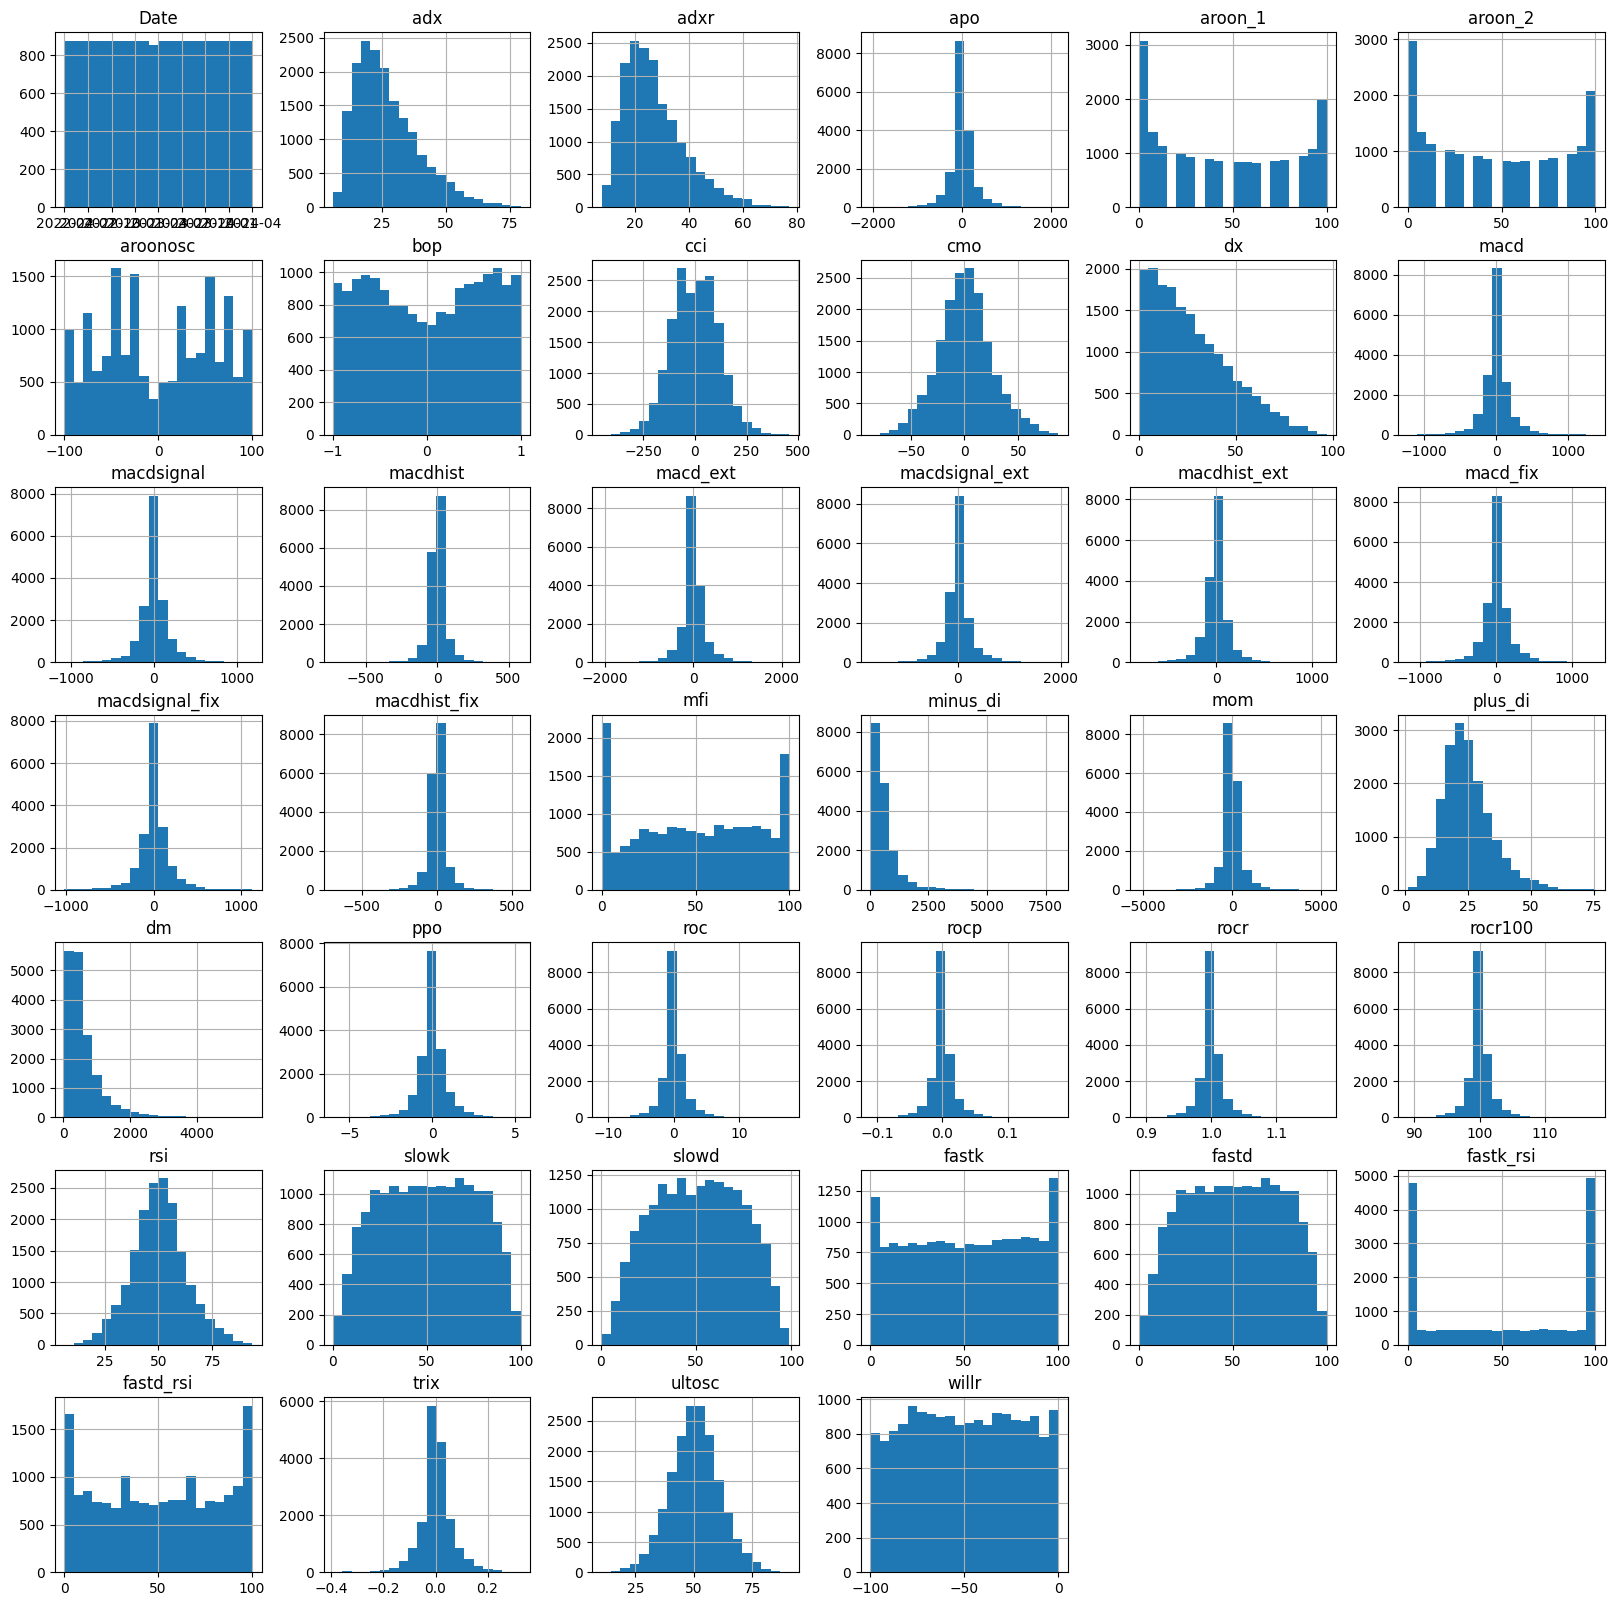

In [ ]:
mom_df_btc_usd.hist(figsize=(20,20), bins=20)

In [ ]:
volume_volat_cycle_price_df_btc_usd = talib_get_volume_volatility_cycle_price_indicators(btc_usd)

array([[<Axes: title={'center': 'Date'}>, <Axes: title={'center': 'ad'}>,
        <Axes: title={'center': 'adosc'}>,
        <Axes: title={'center': 'obv'}>],
       [<Axes: title={'center': 'atr'}>,
        <Axes: title={'center': 'natr'}>,
        <Axes: title={'center': 'ht_dcperiod'}>,
        <Axes: title={'center': 'ht_dcphase'}>],
       [<Axes: title={'center': 'ht_phasor_inphase'}>,
        <Axes: title={'center': 'ht_phasor_quadrature'}>,
        <Axes: title={'center': 'ht_sine_sine'}>,
        <Axes: title={'center': 'ht_sine_leadsine'}>],
       [<Axes: title={'center': 'ht_trendmod'}>,
        <Axes: title={'center': 'avgprice'}>,
        <Axes: title={'center': 'medprice'}>,
        <Axes: title={'center': 'typprice'}>],
       [<Axes: title={'center': 'wclprice'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

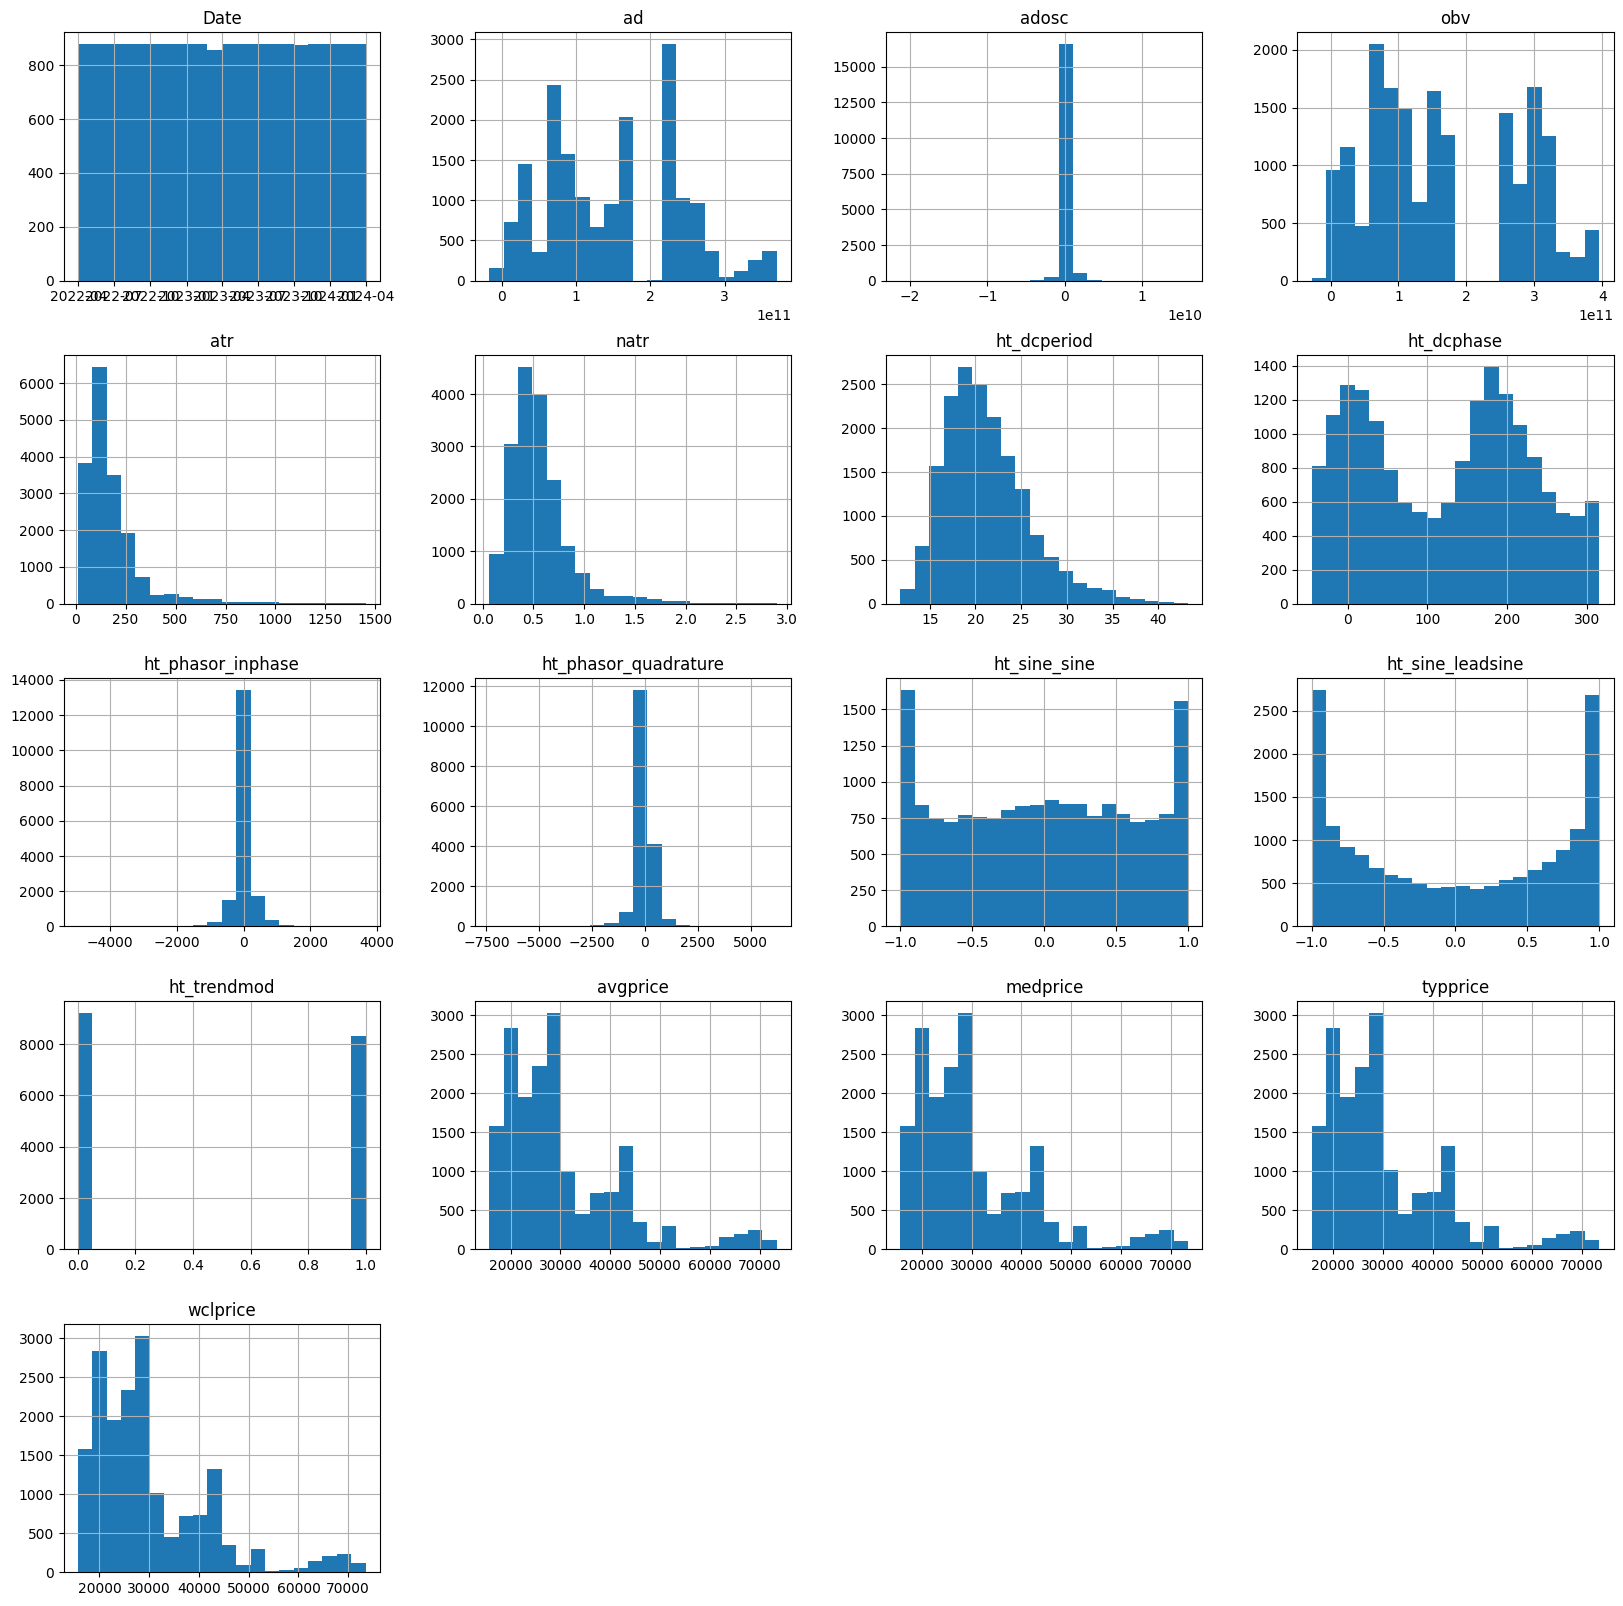

In [ ]:
volume_volat_cycle_price_df_btc_usd.hist(figsize=(20,20), bins=20)

In [ ]:
patterns_df_btc_usd = talib_get_pattern_recognition_indicators(btc_usd)

In [ ]:
patterns_df_btc_usd.describe().T

count      mean        std    min  25%  50%  75%    max
cdl2crows            17521.0 -0.034245   1.850266 -100.0  0.0  0.0  0.0    0.0
cdl3blackrows        17521.0 -0.068489   2.616223 -100.0  0.0  0.0  0.0    0.0
cdl3inside           17521.0 -0.039952  11.077694 -100.0  0.0  0.0  0.0  100.0
cdl3linestrike       17521.0  0.011415   6.229980 -100.0  0.0  0.0  0.0  100.0
cdl3outside          17521.0 -0.062782  23.759078 -100.0  0.0  0.0  0.0  100.0
...                      ...       ...        ...    ...  ...  ...  ...    ...
cdlthrusting         17521.0 -0.896068   9.423847 -100.0  0.0  0.0  0.0    0.0
cdltristar           17521.0  0.045659   2.616721 -100.0  0.0  0.0  0.0  100.0
cdlunique3river      17521.0  0.034245   1.850266    0.0  0.0  0.0  0.0  100.0
cdlupsidegap2crows   17521.0  0.000000   0.000000    0.0  0.0  0.0  0.0    0.0
cdlxsidegap3methods  17521.0 -0.057074  12.228660 -100.0  0.0  0.0  0.0  100.0

[61 rows x 8 columns]

In [ ]:
# sum values on by row
patterns_df_btc_usd['count_indicators'] = patterns_df_btc_usd.sum(axis=1, numeric_only=True)

<Axes: title={'center': 'Sum of indicators at any given moment'}, ylabel='Frequency'>

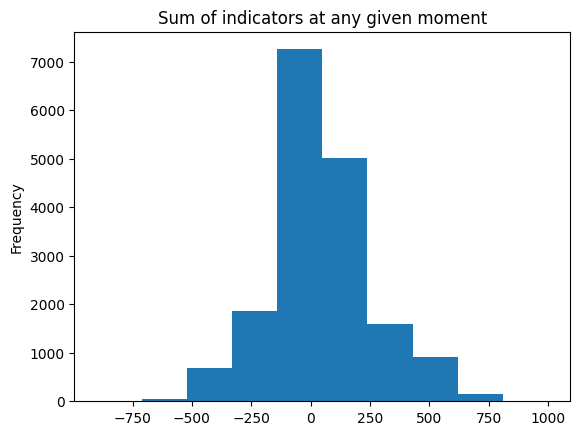

In [ ]:
# TOTAL SUM of Indicators at any given moment of time : distribution: up to 8 (or 16 indicators working simultaneously)

patterns_df_btc_usd.count_indicators.plot(kind='hist', title = "Sum of indicators at any given moment")

In [ ]:
fig = px.line(patterns_df_btc_usd[patterns_df_btc_usd.Date.dt.hour==23].sort_values(by='Date'),
              x="Date",
              y="count_indicators",
              title='Count of indicators by time (only for 1 hour a day at 23:00)')
fig.show()


In [ ]:
PATTERN_KEYS =[key for key in patterns_df_btc_usd.keys() if key not in ['Date','Ticker']]

# frequency_ind = patterns_df_btc_usd.apply(lambda x: np.abs(x),axis=1)
# frequency_ind
# .sum(numeric_only=True)

In [ ]:
# when pattern occurs (either direction --> it is +1)
freq_df = patterns_df_btc_usd.copy(deep=True)

for key in PATTERN_KEYS:
  freq_df[key] = freq_df[key].apply(lambda x: 1 if x!=0 else 0)

In [ ]:
ff = freq_df[PATTERN_KEYS].apply(lambda x: np.sum(x))

In [ ]:
len(btc_usd)

17521

In [ ]:
df_btc_usd_indicators = pd.DataFrame(ff, columns=['sum'])
df_btc_usd_indicators

sum
cdl2crows                6
cdl3blackrows           12
cdl3inside             215
cdl3linestrike          68
cdl3outside            989
...                    ...
cdltristar              12
cdlunique3river          6
cdlupsidegap2crows       0
cdlxsidegap3methods    262
count_indicators     13552

[62 rows x 1 columns]

In [ ]:
df_btc_usd_indicators['percent_occurences'] = df_btc_usd_indicators['sum'] / len(btc_usd)

In [ ]:
# List of indicators : https://ta-lib.github.io/ta-lib-python/
df_btc_usd_indicators.sort_values(by='sum', ascending=False).head(10)

sum  percent_occurences
count_indicators    13552            0.773472
cdlbelthold          3504            0.199989
cdlshortline         3440            0.196336
cdlclosingmarubozu   3108            0.177387
cdllongline          3042            0.173620
cdlhikkake           2559            0.146053
cdlspinningtop       2514            0.143485
cdldoji              2266            0.129331
cdllongleggeddoji    2256            0.128760
cdlengulfing         1999            0.114092

# 7. Get Tech Indicators for all Crypto/ Stock tickers

In [ ]:
merged_df.head()

Open          High           Low         Close     Adj Close  \
0  47075.628906  47257.988281  47022.160156  47183.093750  47183.093750   
1  47188.875000  47398.238281  47175.222656  47396.355469  47396.355469   
2  47406.324219  47406.324219  47205.597656  47235.222656  47235.222656   
3  47232.218750  47255.460938  47093.386719  47099.308594  47099.308594   
4  47100.015625  47139.710938  47010.257812  47021.718750  47021.718750   

     Volume                       Date   Ticker  hour ticker_type  ...  \
0         0  2022-03-31 00:00:00+00:00  BTC-USD     0      crypto  ...   
1         0  2022-03-31 01:00:00+00:00  BTC-USD     1      crypto  ...   
2         0  2022-03-31 02:00:00+00:00  BTC-USD     2      crypto  ...   
3         0  2022-03-31 03:00:00+00:00  BTC-USD     3      crypto  ...   
4  16818176  2022-03-31 04:00:00+00:00  BTC-USD     4      crypto  ...   

   is_positive_growth_future_1h  growth_future_24h  \
0                             1           0.966400   
1                             0           0.952155   
2                             0           0.940667   
3                             0           0.946368   
4                             1           0.951786   

   is_positive_growth_future_24h  growth_2h  growth_5h  growth_10h  \
0                              0        NaN        NaN         NaN   
1                              0        NaN        NaN         NaN   
2                              0   1.001105        NaN         NaN   
3                              0   0.993733        NaN         NaN   
4                              0   0.995480        NaN         NaN   

   growth_24h  growth_72h  growth_168h  growth_720h  
0         NaN         NaN          NaN          NaN  
1         NaN         NaN          NaN          NaN  
2         NaN         NaN          NaN          NaN  
3         NaN         NaN          NaN          NaN  
4         NaN         NaN          NaN          NaN  

[5 rows x 22 columns]

In [ ]:
# to evade an error "Exception: input array type is not double"
# https://stackoverflow.com/questions/51712269/how-to-run-ta-lib-on-multiple-columns-of-a-pandas-dataframe
for f in ['Open','High','Low','Close','Volume', 'Adj Close']:
  merged_df.loc[:,f] = merged_df.loc[:,f].astype('float64')

<ipython-input-87-1d6c1d373118>:4: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



In [ ]:
# get tickers in the data
TICKERS = list(merged_df.Ticker.unique())
TICKERS

['BTC-USD',
 'ETH-USD',
 'USDT-USD',
 'BNB-USD',
 'SOL-USD',
 'XRP-USD',
 'STETH-USD',
 'USDC-USD',
 'DOGE-USD',
 'ADA-USD',
 'AVAX-USD',
 'TON11419-USD',
 'SHIB-USD',
 'DOT-USD',
 'BCH-USD',
 'LINK-USD',
 'WBTC-USD',
 'TRX-USD',
 'WTRX-USD',
 'MATIC-USD',
 'ICP-USD',
 'UNI7083-USD',
 'LTC-USD',
 'NEAR-USD',
 'APT21794-USD',
 'MARA',
 'TSLA',
 'PLTR',
 'AAPL',
 'ROIV',
 'CCL',
 'F',
 'AMD',
 'NIO',
 'RUN',
 'INTC',
 'NYCB',
 'NVDA',
 'RIVN',
 'CLSK',
 'BAC',
 'PFE',
 'AMZN',
 'AAL',
 'WBA',
 'T',
 'SOFI',
 'GOLD',
 'XPEV',
 'VALE']

In [ ]:
len(TICKERS)

50

In [ ]:
import pandas as pd
# supress warnings
pd.options.mode.chained_assignment = None  # default='warn'

# adding Momentum / Pattern/ Volume features to all tickers - one by one
merged_df_with_tech_ind = pd.DataFrame({'A' : []})

current_ticker_data = None
i=0
for ticker in TICKERS:
  i+=1
  print(f'{i}/{len(TICKERS)} Current ticker is {ticker}')
  current_ticker_data = merged_df[merged_df.Ticker.isin([ticker])]
  # need to have same 'utc' time on both sides
  # https://stackoverflow.com/questions/73964894/you-are-trying-to-merge-on-datetime64ns-utc-and-datetime64ns-columns-if-yo
  current_ticker_data['Date']= pd.to_datetime(current_ticker_data['Date'], utc=True)

  # 3 calls to get additional features
  df_current_ticker_momentum_indicators = talib_get_momentum_indicators_for_one_ticker(current_ticker_data)
  df_current_ticker_momentum_indicators["Date"]= pd.to_datetime(df_current_ticker_momentum_indicators['Date'], utc=True)
  # df_current_ticker_momentum_indicators.loc[:,"Date"]= pd.to_datetime(df_current_ticker_momentum_indicators['Date'], utc=True)

  df_current_ticker_volume_indicators = talib_get_volume_volatility_cycle_price_indicators(current_ticker_data)
  df_current_ticker_volume_indicators["Date"]= pd.to_datetime(df_current_ticker_volume_indicators['Date'], utc=True)
  # df_current_ticker_volume_indicators.loc[:,"Date"]= pd.to_datetime(df_current_ticker_volume_indicators['Date'], utc=True)

  df_current_ticker_pattern_indicators = talib_get_pattern_recognition_indicators(current_ticker_data)
  df_current_ticker_pattern_indicators["Date"]= pd.to_datetime(df_current_ticker_pattern_indicators['Date'], utc=True)
  # df_current_ticker_pattern_indicators.loc[:,"Date"]= pd.to_datetime(df_current_ticker_pattern_indicators['Date'], utc=True)

  # merge to one df
  m1 = pd.merge(current_ticker_data, df_current_ticker_momentum_indicators.reset_index(), how = 'left', on = ["Date","Ticker"], validate = "one_to_one")
  m2 = pd.merge(m1, df_current_ticker_volume_indicators.reset_index(), how = 'left', on = ["Date","Ticker"], validate = "one_to_one")
  m3 = pd.merge(m2, df_current_ticker_pattern_indicators.reset_index(), how = 'left', on = ["Date","Ticker"], validate = "one_to_one")

  if merged_df_with_tech_ind.empty:
    merged_df_with_tech_ind = m3
  else:
    merged_df_with_tech_ind = pd.concat([merged_df_with_tech_ind,m3], ignore_index = False)



1/50 Current ticker is BTC-USD
2/50 Current ticker is ETH-USD
3/50 Current ticker is USDT-USD
4/50 Current ticker is BNB-USD
5/50 Current ticker is SOL-USD
6/50 Current ticker is XRP-USD
7/50 Current ticker is STETH-USD
8/50 Current ticker is USDC-USD
9/50 Current ticker is DOGE-USD
10/50 Current ticker is ADA-USD
11/50 Current ticker is AVAX-USD
12/50 Current ticker is TON11419-USD
13/50 Current ticker is SHIB-USD
14/50 Current ticker is DOT-USD
15/50 Current ticker is BCH-USD
16/50 Current ticker is LINK-USD
17/50 Current ticker is WBTC-USD
18/50 Current ticker is TRX-USD
19/50 Current ticker is WTRX-USD
20/50 Current ticker is MATIC-USD
21/50 Current ticker is ICP-USD
22/50 Current ticker is UNI7083-USD
23/50 Current ticker is LTC-USD
24/50 Current ticker is NEAR-USD
25/50 Current ticker is APT21794-USD
26/50 Current ticker is MARA
27/50 Current ticker is TSLA
28/50 Current ticker is PLTR
29/50 Current ticker is AAPL
30/50 Current ticker is ROIV
31/50 Current ticker is CCL
32/50 Cur

In [ ]:
merged_df_with_tech_ind.to_parquet('merged_df_with_tech_ind.parquet.brotli',
              compression='brotli')

In [ ]:
merged_df_with_tech_ind.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510998 entries, 0 to 3508
Columns: 141 entries, Open to cdlxsidegap3methods
dtypes: datetime64[ns, UTC](1), float64(70), int32(62), int64(6), object(2)
memory usage: 432.7+ MB


In [ ]:
# crypto has more observations - as 24hrs*7 days vs. less for stocks
merged_df_with_tech_ind.ticker_type.value_counts()

crypto    423285
stock      87713
Name: ticker_type, dtype: int64

In [ ]:
merged_df_with_tech_ind.head(1)

Open          High           Low        Close    Adj Close  Volume  \
0  47075.628906  47257.988281  47022.160156  47183.09375  47183.09375     0.0   

                       Date   Ticker  hour ticker_type  ...  cdlspinningtop  \
0 2022-03-31 00:00:00+00:00  BTC-USD     0      crypto  ...               0   

   cdlstalledpattern  cdlsticksandwich  cdltakuru  cdltasukigap  cdlthrusting  \
0                  0                 0          0             0             0   

   cdltristar  cdlunique3river  cdlupsidegap2crows  cdlxsidegap3methods  
0           0                0                   0                    0  

[1 rows x 141 columns]

In [ ]:
# is_positive_growth_future_1h
# is_positive_growth_future_24h
merged_df_with_tech_ind.keys()
# merged_df_with_tech_ind.keys().to_list()

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Date', 'Ticker',
       'hour', 'ticker_type',
       ...
       'cdlspinningtop', 'cdlstalledpattern', 'cdlsticksandwich', 'cdltakuru',
       'cdltasukigap', 'cdlthrusting', 'cdltristar', 'cdlunique3river',
       'cdlupsidegap2crows', 'cdlxsidegap3methods'],
      dtype='object', length=141)

In [ ]:
# Pattern indicators start from 'cdl...' : https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/pattern_recognition.md
PATTERN_IND = [k for k in merged_df_with_tech_ind.keys() if k.startswith('cdl')]
len(PATTERN_IND)

61

In [ ]:
# define new field = 'how many indicators worked'
# row-level sum
merged_df_with_tech_ind['patterns_sum'] = merged_df_with_tech_ind[PATTERN_IND].apply(lambda row: row.sum(), axis=1)
# merged_df_with_tech_ind['patterns_count'] = merged_df_with_tech_ind[PATTERN_IND].apply(lambda row: row[row.notnull() & (row != 0)].sum(), axis=1)

<Axes: >

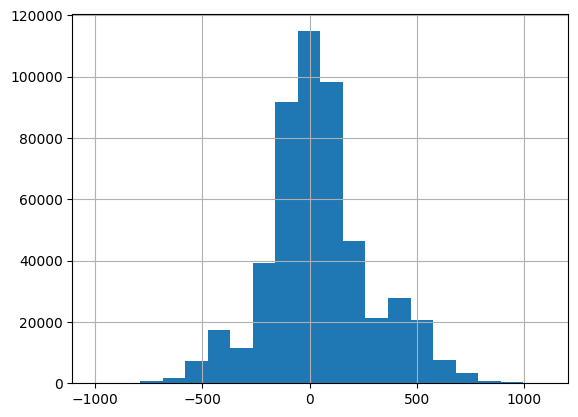

In [ ]:
merged_df_with_tech_ind['patterns_sum'].hist(bins=20)

In [ ]:
merged_df_with_tech_ind['patterns_sum_abs'] = merged_df_with_tech_ind[PATTERN_IND].apply(lambda row: row.abs().sum(), axis=1)

<Axes: >

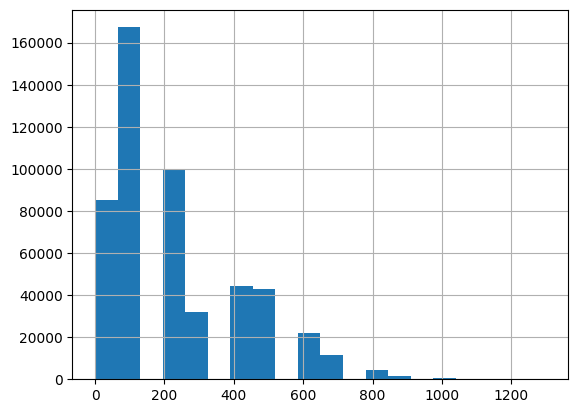

In [ ]:
# total sum of abs. values
merged_df_with_tech_ind['patterns_sum_abs'].hist(bins=20)

In [ ]:
# count of non-zero values (if Pattern happenned ==> it is non-zero)
merged_df_with_tech_ind['patterns_count'] = merged_df_with_tech_ind[PATTERN_IND].apply(lambda row: (row != 0).sum(), axis=1)

<Axes: >

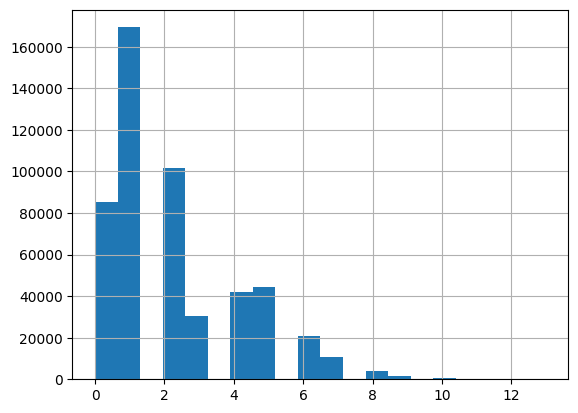

In [ ]:
merged_df_with_tech_ind['patterns_count'].hist(bins=20)

# 8. Feature correlations with future growth of 1hr and 24hrs

In [ ]:
# 1hr correlations
corr_1h = merged_df_with_tech_ind.corr(numeric_only=True)['is_positive_growth_future_1h']

In [ ]:
corr_1h_df = pd.DataFrame(corr_1h)

In [ ]:
corr_1h_df.sort_values(by='is_positive_growth_future_1h').head(5)

is_positive_growth_future_1h
cci                           -0.046603
willr                         -0.045041
fastk                         -0.043608
fastk_rsi                     -0.043051
fastd                         -0.041310

In [ ]:
# do not look at the _growth_future_ columns, as they are highly correlated by is_positive_growth_future_1h by construction
corr_1h_df.sort_values(by='is_positive_growth_future_1h').tail(10)

is_positive_growth_future_1h
cdlinvertedhammer                                  0.008484
cdlhammer                                          0.008588
cdlharami                                          0.011069
aroon_1                                            0.023953
growth_future_24h                                  0.112569
is_positive_growth_future_24h                      0.135597
growth_future_1h                                   0.529257
is_positive_growth_future_1h                       1.000000
cdl3starsinsouth                                        NaN
cdlmathold                                              NaN

In [ ]:
PATTERN_TOTALS = [k for k in merged_df_with_tech_ind.keys() if k.startswith('patterns')]
PATTERN_TOTALS

['patterns_sum', 'patterns_sum_abs', 'patterns_count']

In [ ]:
corr_1h_df[corr_1h_df.index.isin(PATTERN_TOTALS)]

is_positive_growth_future_1h
patterns_sum                         -0.006888
patterns_sum_abs                      0.000816
patterns_count                        0.001060

In [ ]:
# 24hr correlations
corr_24h = merged_df_with_tech_ind.corr(numeric_only=True)['is_positive_growth_future_24h']

In [ ]:
corr_24h_df = pd.DataFrame(corr_24h)

In [ ]:
corr_24h_df.sort_values(by='is_positive_growth_future_24h').head(5)

is_positive_growth_future_24h
cci                             -0.045357
cmo                             -0.043913
rsi                             -0.043503
growth_24h                      -0.042041
willr                           -0.040713

In [ ]:
corr_24h_df.sort_values(by='is_positive_growth_future_24h').tail(10)

is_positive_growth_future_24h
cdlharami                                           0.008162
minus_di                                            0.010895
ht_sine_leadsine                                    0.021300
aroon_1                                             0.034197
growth_future_1h                                    0.132389
is_positive_growth_future_1h                        0.135597
growth_future_24h                                   0.606376
is_positive_growth_future_24h                       1.000000
cdl3starsinsouth                                         NaN
cdlmathold                                               NaN

In [ ]:
corr_24h_df[corr_24h_df.index.isin(PATTERN_TOTALS)]

is_positive_growth_future_24h
patterns_sum                          -0.006084
patterns_sum_abs                       0.004691
patterns_count                         0.004761

# 9. Decision Tree to predict: 1hr vs. 24hr, all_data vs. crypto vs. stocks


In [ ]:
# check all non-int/float variables
dtypes_to_convert = merged_df_with_tech_ind.dtypes[merged_df_with_tech_ind.dtypes != 'int32'][merged_df_with_tech_ind.dtypes != 'float64'][merged_df_with_tech_ind.dtypes != 'int64']

print("Data types that may need conversion:")
print(dtypes_to_convert)

Data types that may need conversion:
Date           datetime64[ns, UTC]
Ticker                      object
ticker_type                 object
dtype: object


In [ ]:
# generate dummies for Ticker and ticker_type
merged_df_with_dummies = pd.get_dummies(merged_df_with_tech_ind, columns=['Ticker', 'ticker_type'])


In [ ]:
merged_df_with_dummies.head(1)

Open          High           Low        Close    Adj Close  Volume  \
0  47075.628906  47257.988281  47022.160156  47183.09375  47183.09375     0.0   

                       Date  hour  growth_1h  growth_future_1h  ...  \
0 2022-03-31 00:00:00+00:00     0        NaN           1.00452  ...   

   Ticker_USDC-USD  Ticker_USDT-USD  Ticker_VALE  Ticker_WBA  Ticker_WBTC-USD  \
0                0                0            0           0                0   

   Ticker_WTRX-USD  Ticker_XPEV  Ticker_XRP-USD  ticker_type_crypto  \
0                0            0               0                   1   

   ticker_type_stock  
0                  0  

[1 rows x 194 columns]

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [ ]:
TO_DROP = ['is_positive_growth_future_1h', 'growth_future_1h', 'growth_future_24h', 'is_positive_growth_future_24h']
TO_PREDICT = 'is_positive_growth_future_1h'

# run on this df = merged_df_with_dummies

In [ ]:
# df - input dataframe, to_predict='Feature_to_predict', to_drop = list of features to be dropped, max_depth = max_depth of a tree
def run_decision_tree(df: pd.DataFrame, to_predict, to_drop, max_depth=20):
  # Temporal split
  # Find the minimum and maximum dates available in the dataset
  min_date = df['Date'].min()
  max_date = df['Date'].max()

  # Define the percentage for training and testing
  train_percent = 0.8  # Adjust this percentage as needed
  test_percent = 1 - train_percent

  # Calculate the split date based on the minimum and maximum dates
  split_date = min_date + (max_date - min_date) * train_percent
  print(f'Min_date={min_date}, max_date={max_date}, split_date={split_date}')

  # Split the data into training and testing sets based on the split date
  train_df = df[df['Date'] < split_date]
  test_df = df[df['Date'] >= split_date]

  # Separate features and target variable for training and testing sets
  X_train = train_df.drop(to_drop+['Date'], axis=1)  # Remove variables
  y_train = train_df[to_predict]
  X_test = test_df.drop(to_drop+['Date'], axis=1)
  y_test = test_df[to_predict]

  # Impute missing values in X_train and X_test --
  imputer = SimpleImputer(strategy='mean')
  X_train_imputed = imputer.fit_transform(X_train)
  X_test_imputed = imputer.transform(X_test)

  # Initialize the Decision Tree Classifier
  clf = DecisionTreeClassifier(max_depth=max_depth)

  # Fit the classifier to the training data
  clf.fit(X_train_imputed, y_train)

  # Predict the target variable on the test data
  y_pred = clf.predict(X_test_imputed)

  max_depth = clf.tree_.max_depth
  # Print the maximum depth
  print("Maximum depth of the decision tree:", max_depth)

  # Calculate the accuracy of the model
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy:", accuracy)

  return clf, X_train.columns

In [ ]:
#run decision tree to predict growth on 1 hr - all data
%%time
TO_PREDICT = 'is_positive_growth_future_1h'
clf_1hr, train_columns = run_decision_tree(merged_df_with_dummies, TO_PREDICT, TO_DROP )

Min_date=2022-03-29 13:30:00+00:00, max_date=2024-03-30 22:00:00+00:00, split_date=2023-11-05 10:42:00+00:00
Maximum depth of the decision tree: 20
Accuracy: 0.5110062144903261
CPU times: user 1min 50s, sys: 3.22 s, total: 1min 53s
Wall time: 2min 5s


In [ ]:
# 0 ==> it is crypto; 1==> it is stock
merged_df_with_dummies.ticker_type_stock.value_counts()

0    423285
1     87713
Name: ticker_type_stock, dtype: int64

In [ ]:
#run decision tree to predict growth on 1 hr - CRYPTO
%%time
TO_PREDICT = 'is_positive_growth_future_1h'
clf_1hr_crypto, train_columns = run_decision_tree(merged_df_with_dummies[merged_df_with_dummies.ticker_type_stock==0], TO_PREDICT, TO_DROP )

Min_date=2022-03-31 00:00:00+00:00, max_date=2024-03-30 22:00:00+00:00, split_date=2023-11-05 17:36:00+00:00
Maximum depth of the decision tree: 20
Accuracy: 0.5135039576632678
CPU times: user 1min 25s, sys: 1.81 s, total: 1min 27s
Wall time: 1min 28s


In [ ]:
#run decision tree to predict growth on 1 hr - STOCKS
%%time
TO_PREDICT = 'is_positive_growth_future_1h'
clf_1hr_stocks, train_columns = run_decision_tree(merged_df_with_dummies[merged_df_with_dummies.ticker_type_stock==1], TO_PREDICT, TO_DROP )

Min_date=2022-03-29 13:30:00+00:00, max_date=2024-03-28 19:30:00+00:00, split_date=2023-11-03 18:18:00+00:00
Maximum depth of the decision tree: 20
Accuracy: 0.5021998379066805
CPU times: user 16.5 s, sys: 256 ms, total: 16.8 s
Wall time: 20.9 s


In [ ]:
#run decision tree to predict growth on 24 hr (stocks+crypto)
%%time
TO_PREDICT = 'is_positive_growth_future_24h'
clf_24hr, train_columns = run_decision_tree(merged_df_with_dummies, TO_PREDICT, TO_DROP )

Min_date=2022-03-29 13:30:00+00:00, max_date=2024-03-30 22:00:00+00:00, split_date=2023-11-05 10:42:00+00:00
Maximum depth of the decision tree: 20
Accuracy: 0.5064476526737536
CPU times: user 1min 36s, sys: 2.8 s, total: 1min 38s
Wall time: 1min 39s


In [ ]:
#run decision tree to predict growth on 24 hr - CRYPTO
%%time
TO_PREDICT = 'is_positive_growth_future_24h'
clf_24hr_crypto, train_columns = run_decision_tree(merged_df_with_dummies[merged_df_with_dummies.ticker_type_stock==0], TO_PREDICT, TO_DROP )

Min_date=2022-03-31 00:00:00+00:00, max_date=2024-03-30 22:00:00+00:00, split_date=2023-11-05 17:36:00+00:00
Maximum depth of the decision tree: 20
Accuracy: 0.5119756381304318
CPU times: user 1min 21s, sys: 1.7 s, total: 1min 23s
Wall time: 1min 23s


In [ ]:
#run decision tree to predict growth on 24 hr - STOCKS
%%time
TO_PREDICT = 'is_positive_growth_future_24h'
clf_24hr_stocks, train_columns = run_decision_tree(merged_df_with_dummies[merged_df_with_dummies.ticker_type_stock==1], TO_PREDICT, TO_DROP )

Min_date=2022-03-29 13:30:00+00:00, max_date=2024-03-28 19:30:00+00:00, split_date=2023-11-03 18:18:00+00:00
Maximum depth of the decision tree: 20
Accuracy: 0.49507930994558297
CPU times: user 13.2 s, sys: 323 ms, total: 13.5 s
Wall time: 13.6 s


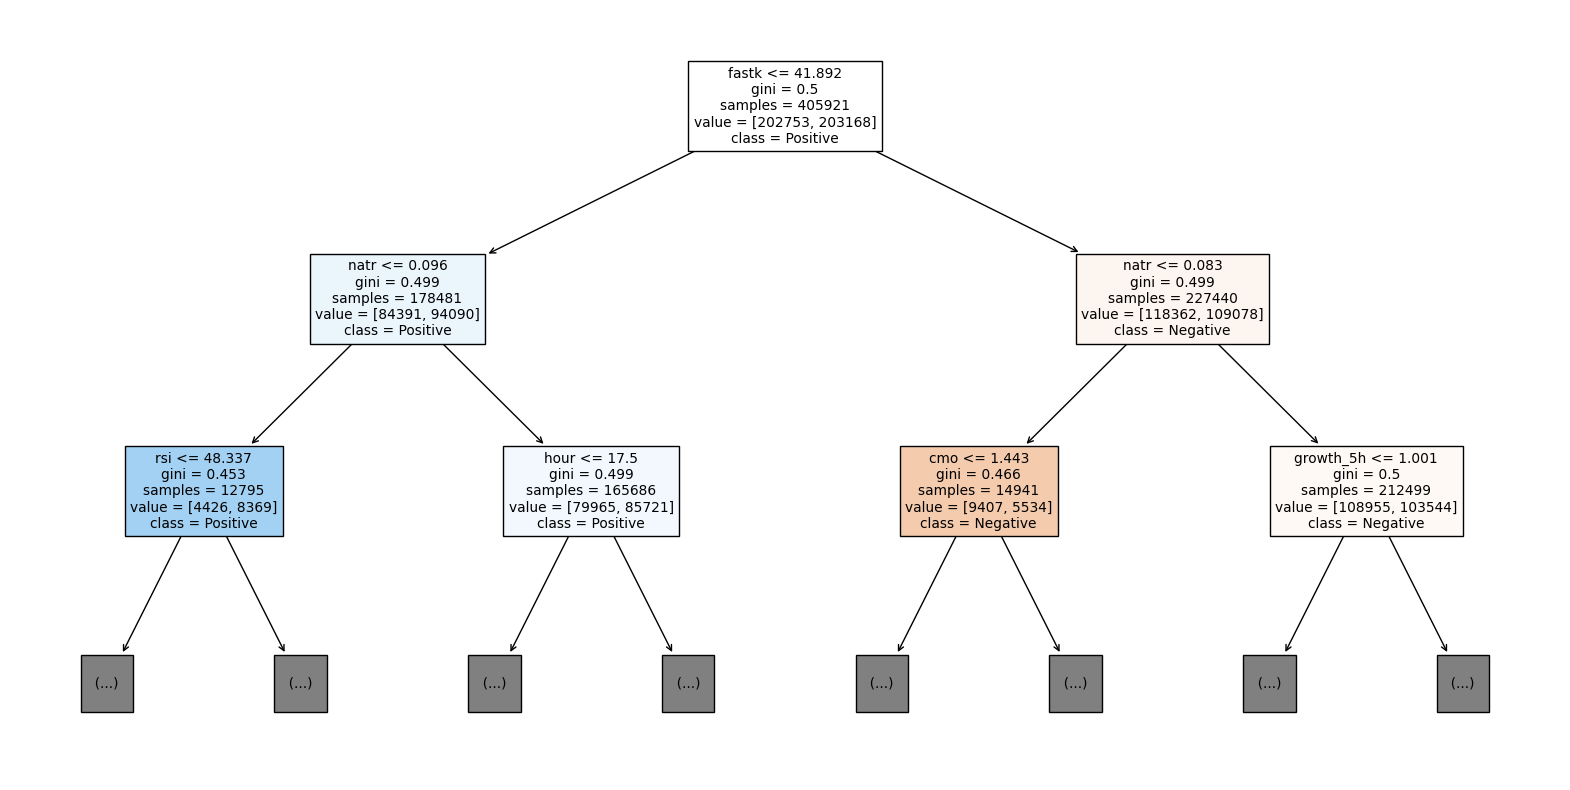

In [ ]:
# visualisation: decision tree for 1 hr (STOCKS+CRYPTO)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming clf is your trained DecisionTreeClassifier
plt.figure(figsize=(20,10))  # Set the size of the figure
plot_tree(clf_1hr,
          filled=True,
          feature_names=train_columns,
          class_names=['Negative', 'Positive'],
          max_depth=2)
plt.show()

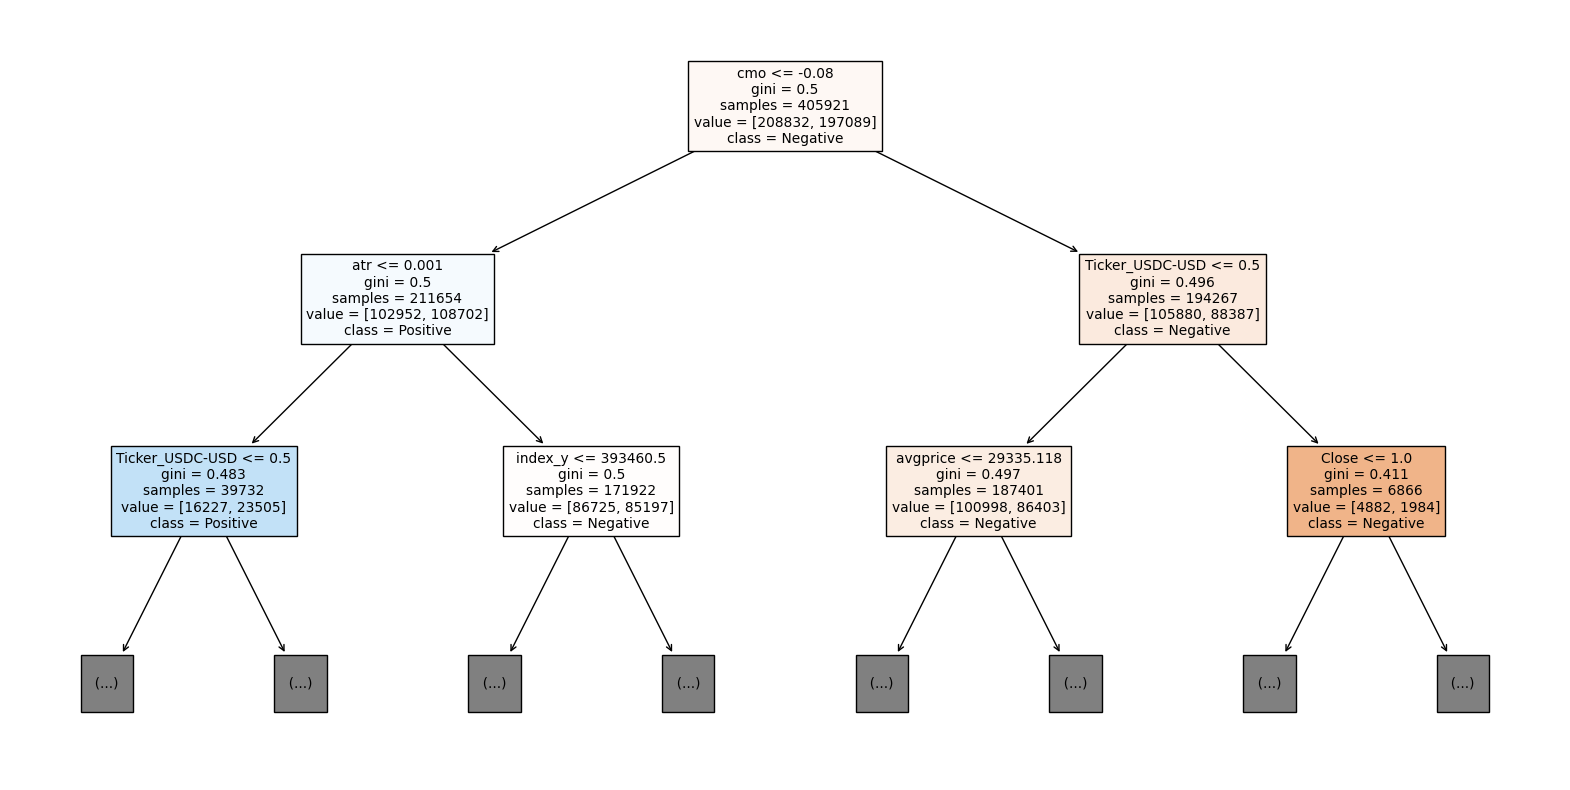

In [ ]:
# decision tree for 24 hr (STOCKS+CRYPTO)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming clf is your trained DecisionTreeClassifier
plt.figure(figsize=(20,10))  # Set the size of the figure
plot_tree(clf_24hr,
          filled=True,
          feature_names=train_columns,
          class_names=['Negative', 'Positive'],
          max_depth=2)
plt.show()

In [ ]:
# Feautures importance function to predict future returns (based on the classifier)
# get feature importance from 'clf' (classifier) and 'train_columns' (column names)

def get_importances(clf, train_columns):
  # Assuming clf is your trained DecisionTreeClassifier
  feature_importance = clf.feature_importances_

  # Assuming X_train is your training features
  feature_names = train_columns

  # Create a DataFrame to store feature importance
  feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

  # Sort the DataFrame by importance in descending order
  feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

  # Print or display the feature importance DataFrame
  # print(feature_importance_df)
  return feature_importance_df

In [ ]:
get_importances(clf_1hr, train_columns).head()

Feature  Importance
60         natr    0.029571
8     growth_2h    0.028121
7     growth_1h    0.026964
48        fastk    0.026186
14  growth_720h    0.025853

In [ ]:
get_importances(clf_1hr_crypto, train_columns).head()

Feature  Importance
60         natr    0.032186
22          bop    0.028108
13  growth_168h    0.025646
14  growth_720h    0.025144
61  ht_dcperiod    0.025045

In [ ]:
get_importances(clf_1hr_stocks, train_columns).head()

Feature  Importance
8              growth_2h    0.025922
53                ultosc    0.025299
61           ht_dcperiod    0.024742
7              growth_1h    0.022919
64  ht_phasor_quadrature    0.022513

In [ ]:
get_importances(clf_24hr, train_columns).head()

Feature  Importance
14  growth_720h    0.069552
52         trix    0.050483
13  growth_168h    0.050126
58          obv    0.049110
56           ad    0.047585

In [ ]:
get_importances(clf_24hr_crypto, train_columns).head()

Feature  Importance
14  growth_720h    0.066198
13  growth_168h    0.052677
52         trix    0.050487
58          obv    0.044598
56           ad    0.043201

In [ ]:
get_importances(clf_24hr_stocks, train_columns).head()

Feature  Importance
56           ad    0.061495
58          obv    0.060775
14  growth_720h    0.053610
13  growth_168h    0.051873
72        index    0.050830